In [1]:
#%% Imports

# Basic Imports 
import numpy as np
import pandas as pd

# Plotting Imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from networkx import DiGraph
import networkx as nx
import statistics
from itertools import permutations
from itertools import combinations #no longer being used
from IPython import display

In [25]:
import glob

path = "./test"
all_files = glob.glob(path + "/*.tsv")
df = pd.concat((pd.read_csv(f, sep = '\t').assign(filename = f) for f in all_files))

## Sample DOIDs:

In [2]:
#Function to run when you get the whole dataset:
import glob

path = "./eval"
all_files = glob.glob(path + "/*.tsv")
df = pd.concat((pd.read_csv(f, sep = '\t').assign(filename = f) for f in all_files))

df['filename'] = df['filename'].apply(lambda x: (x[7:]))
df[['DOID','SourceTrain']] = df.filename.str.split("_source=",expand=True)
df[['SourceTrain', 'Dummy', 'SourceEval']] = df.SourceTrain.str.split('=', expand = True)
df['SourceTrain'] = df['SourceTrain'].apply(lambda x: (x[:-6]))
df['SourceEval'] = df['SourceEval'].apply(lambda x: (x[:-4]))
df = df.drop(columns = ['filename', 'Dummy'])
df

auROC  log2(auPRC/prior)  log2(P@r10/prior)  log2(P@r20/prior)  \
0   0.873233           2.614241           3.147584           2.799661   
0   0.708895           0.977403           1.990186           1.797541   
0   0.751768           1.353335           1.634851           1.634851   
0   0.645484           0.817277           1.232059           1.232059   
0   0.813164           2.210550           3.086537           2.786976   
..       ...                ...                ...                ...   
0   0.773690           0.517985           0.348399           0.541044   
0   0.672131           0.669673               -inf               -inf   
0   0.796087           1.007461           1.588456           1.353990   
0   0.834118           0.460756           0.612854           0.612854   
0   0.863722           2.988346           3.754888           2.754888   

    log2(P@r50/prior)     R@r10     R@r20     R@r50          DOID  \
0            2.662157  0.148936  0.234043  0.531915     DOID:8692   
0            1.191820  0.067797  0.118644  0.194915      DOID:936   
0            1.705241  0.055556  0.111111  0.291667      DOID:150   
0            1.232059  0.039216  0.078431  0.196078      DOID:263   
0            2.349571  0.145455  0.236364  0.436364     DOID:2256   
..                ...       ...       ...       ...           ...   
0            0.645380  0.011532  0.026359  0.070840       DOID:74   
0                -inf  0.000000  0.000000  0.000000     DOID:1793   
0            1.266528  0.036364  0.061818  0.145455  DOID:0080199   
0            0.612854  0.011050  0.022099  0.055249     DOID:2914   
0            2.017922  0.250000  0.250000  0.375000      DOID:178   

         SourceTrain SourceEval  
0          CTD-human        CGI  
0                CGI    UNIPROT  
0          CTD-human    UNIPROT  
0            UNIPROT   ORPHANET  
0   GENOMICS-ENGLAND   ORPHANET  
..               ...        ...  
0   GENOMICS-ENGLAND  CTD-human  
0   GENOMICS-ENGLAND    UNIPROT  
0          CTD-human  CTD-human  
0          CTD-human  CTD-human  
0            UNIPROT    UNIPROT  

[2098 rows x 11 columns]

In [5]:
dict_of_DOIDS = dict(iter(df.groupby('DOID')))

for DOID in dict_of_DOIDS:
    resultLog = dict_of_DOIDS[DOID].pivot("SourceTrain", "SourceEval", "log2(auPRC/prior)")
    resultauROC = dict_of_DOIDS[DOID].pivot("SourceTrain", "SourceEval", "auROC")
    fig, axes = plt.subplots(1, 2)
    #fig, ax = plt.subplots(figsize=(8,6))   
    sns.heatmap(resultLog, annot = True, linewidths = .25, ax=axes[0])
    sns.heatmap(resultauROC, annot = True, linewidths = .25, ax=axes[1])
    plt.title(DOID)
    plt.show()

KeyError: 'DOID'

## Selected Diseases:

In [3]:
df = pd.read_csv('DesiredDataArjunAllDisease_filtered.tsv', sep = '\t')
df

dis_doid                                   dis_name  \
0        #DOID:162                                     cancer   
1        #DOID:863                     nervous system disease   
2         #DOID:77            gastrointestinal system disease   
3       #DOID:3119             gastrointestinal system cancer   
4        #DOID:305                                  carcinoma   
..             ...                                        ...   
147   DOID:0050439                             Usher syndrome   
148      DOID:8499                            night blindness   
149  #DOID:0050534      congenital stationary night blindness   
150   DOID:0050524       maturity-onset diabetes of the young   
151   DOID:0060655  autosomal recessive congenital ichthyosis   

     numgenes_CLINGEN  numgenes_CGI  numgenes_CTD_human  \
0                  32           307                2963   
1                  37            47                1657   
2                   5            71                1433   
3                   3            76                 993   
4                   2           112                1087   
..                ...           ...                 ...   
147                10             0                  10   
148                 0             0                  14   
149                 0             0                  14   
150                 1             0                  13   
151                 0             0                  10   

     numgenes_GENOMICS_ENGLAND  numgenes_ORPHANET  numgenes_PSYGENET  \
0                          168                247                  0   
1                          974                601                  0   
2                          162                 76                  0   
3                           29                 17                  0   
4                           36                 36                  0   
..                         ...                ...                ...   
147                         12                  8                  0   
148                         12                  2                  0   
149                         11                  2                  0   
150                         13                 14                  0   
151                         12                 12                  0   

     numgenes_UNIPROT  numgenes_dir  numgenes_prop  numsource_ge10  
0                 740           128           3574               6  
1                 553            53           2206               6  
2                 553            12           1987               5  
3                 528             6           1463               5  
4                 211           166           1310               5  
..                ...           ...            ...             ...  
147                 9            14             16               3  
148                11             7             14               3  
149                10            17             14               3  
150                10            14             14               4  
151                10            11             12               4  

[152 rows x 12 columns]

In [4]:
selected = df[df['dis_doid'].map(lambda d: d[0:1] == '#')]
selected['dis_doid'] = selected['dis_doid'].apply(lambda x: (x[1:]))
selected

<ipython-input-4-5f912735fcf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected['dis_doid'] = selected['dis_doid'].apply(lambda x: (x[1:]))


dis_doid                                           dis_name  \
0        DOID:162                                             cancer   
1        DOID:863                             nervous system disease   
2         DOID:77                    gastrointestinal system disease   
3       DOID:3119                     gastrointestinal system cancer   
4        DOID:305                                          carcinoma   
..            ...                                                ...   
107     DOID:1342                      congenital hypoplastic anemia   
108     DOID:1793                                  pancreatic cancer   
123      DOID:628        combined T cell and B cell immunodeficiency   
129  DOID:0110274  autosomal recessive limb-girdle muscular dystr...   
149  DOID:0050534              congenital stationary night blindness   

     numgenes_CLINGEN  numgenes_CGI  numgenes_CTD_human  \
0                  32           307                2963   
1                  37            47                1657   
2                   5            71                1433   
3                   3            76                 993   
4                   2           112                1087   
..                ...           ...                 ...   
107                 9             0                  25   
108                 0            17                  28   
123                 1             0                  24   
129                 0             0                  12   
149                 0             0                  14   

     numgenes_GENOMICS_ENGLAND  numgenes_ORPHANET  numgenes_PSYGENET  \
0                          168                247                  0   
1                          974                601                  0   
2                          162                 76                  0   
3                           29                 17                  0   
4                           36                 36                  0   
..                         ...                ...                ...   
107                         54                 20                  0   
108                          2                  8                  0   
123                         28                 26                  0   
129                         23                  9                  0   
149                         11                  2                  0   

     numgenes_UNIPROT  numgenes_dir  numgenes_prop  numsource_ge10  
0                 740           128           3574               6  
1                 553            53           2206               6  
2                 553            12           1987               5  
3                 528             6           1463               5  
4                 211           166           1310               5  
..                ...           ...            ...             ...  
107                14            32             60               4  
108                15           107             58               3  
123                16            42             38               4  
129                20             8             30               3  
149                10            17             14               3  

[77 rows x 12 columns]

In [10]:
selected.to_csv('selectedDOIDS.csv', index = False)

In [20]:
selected['dis_doid'].unique()

array(['DOID:162', 'DOID:863', 'DOID:77', 'DOID:3119', 'DOID:305',
       'DOID:150', 'DOID:1287', 'DOID:0014667', 'DOID:2914', 'DOID:936',
       'DOID:5295', 'DOID:850', 'DOID:10155', 'DOID:5672', 'DOID:9256',
       'DOID:65', 'DOID:74', 'DOID:178', 'DOID:5614', 'DOID:0080199',
       'DOID:114', 'DOID:2994', 'DOID:1324', 'DOID:3905', 'DOID:0080001',
       'DOID:655', 'DOID:557', 'DOID:2531', 'DOID:299', 'DOID:1240',
       'DOID:1289', 'DOID:409', 'DOID:37', 'DOID:3996', 'DOID:3908',
       'DOID:1749', 'DOID:9351', 'DOID:3620', 'DOID:417', 'DOID:574',
       'DOID:263', 'DOID:8692', 'DOID:5679', 'DOID:0050700',
       'DOID:0060058', 'DOID:423', 'DOID:3070', 'DOID:2394', 'DOID:50',
       'DOID:403', 'DOID:4451', 'DOID:8466', 'DOID:365', 'DOID:3571',
       'DOID:4960', 'DOID:0050387', 'DOID:4467', 'DOID:2355', 'DOID:1443',
       'DOID:480', 'DOID:612', 'DOID:2256', 'DOID:700', 'DOID:1781',
       'DOID:9455', 'DOID:9252', 'DOID:9884', 'DOID:0050951', 'DOID:1247',
       'DOID:7

In [6]:
#Function to run when you get the whole dataset:
import glob

path = "./eval"
all_files = glob.glob(path + "/*.tsv")
df = pd.concat((pd.read_csv(f, sep = '\t').assign(filename = f) for f in all_files))

df['filename'] = df['filename'].apply(lambda x: (x[7:]))
df[['DOID','SourceTrain']] = df.filename.str.split("_source=",expand=True)
df[['SourceTrain', 'Dummy', 'SourceEval']] = df.SourceTrain.str.split('=', expand = True)
df['SourceTrain'] = df['SourceTrain'].apply(lambda x: (x[:-6]))
df['SourceEval'] = df['SourceEval'].apply(lambda x: (x[:-4]))
df = df.drop(columns = ['filename', 'Dummy'])
df

auROC  log2(auPRC/prior)  log2(P@r10/prior)  log2(P@r20/prior)  \
0   0.873233           2.614241           3.147584           2.799661   
0   0.708895           0.977403           1.990186           1.797541   
0   0.751768           1.353335           1.634851           1.634851   
0   0.645484           0.817277           1.232059           1.232059   
0   0.813164           2.210550           3.086537           2.786976   
..       ...                ...                ...                ...   
0   0.773690           0.517985           0.348399           0.541044   
0   0.672131           0.669673               -inf               -inf   
0   0.796087           1.007461           1.588456           1.353990   
0   0.834118           0.460756           0.612854           0.612854   
0   0.863722           2.988346           3.754888           2.754888   

    log2(P@r50/prior)     R@r10     R@r20     R@r50          DOID  \
0            2.662157  0.148936  0.234043  0.531915     DOID:8692   
0            1.191820  0.067797  0.118644  0.194915      DOID:936   
0            1.705241  0.055556  0.111111  0.291667      DOID:150   
0            1.232059  0.039216  0.078431  0.196078      DOID:263   
0            2.349571  0.145455  0.236364  0.436364     DOID:2256   
..                ...       ...       ...       ...           ...   
0            0.645380  0.011532  0.026359  0.070840       DOID:74   
0                -inf  0.000000  0.000000  0.000000     DOID:1793   
0            1.266528  0.036364  0.061818  0.145455  DOID:0080199   
0            0.612854  0.011050  0.022099  0.055249     DOID:2914   
0            2.017922  0.250000  0.250000  0.375000      DOID:178   

         SourceTrain SourceEval  
0          CTD-human        CGI  
0                CGI    UNIPROT  
0          CTD-human    UNIPROT  
0            UNIPROT   ORPHANET  
0   GENOMICS-ENGLAND   ORPHANET  
..               ...        ...  
0   GENOMICS-ENGLAND  CTD-human  
0   GENOMICS-ENGLAND    UNIPROT  
0          CTD-human  CTD-human  
0          CTD-human  CTD-human  
0            UNIPROT    UNIPROT  

[2098 rows x 11 columns]

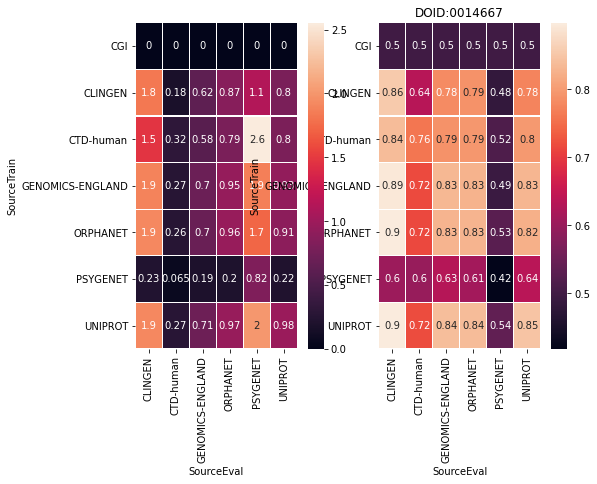

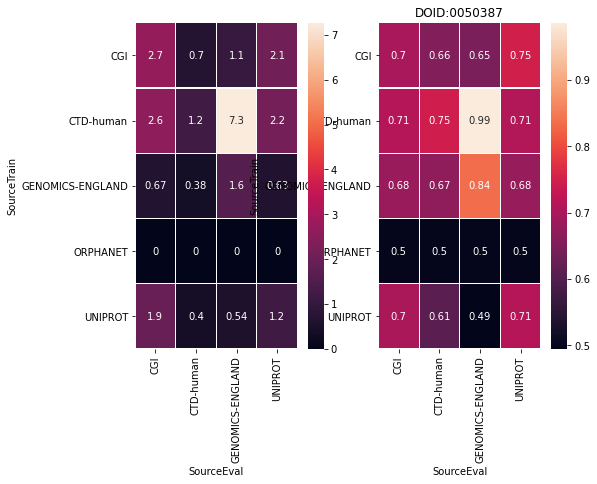

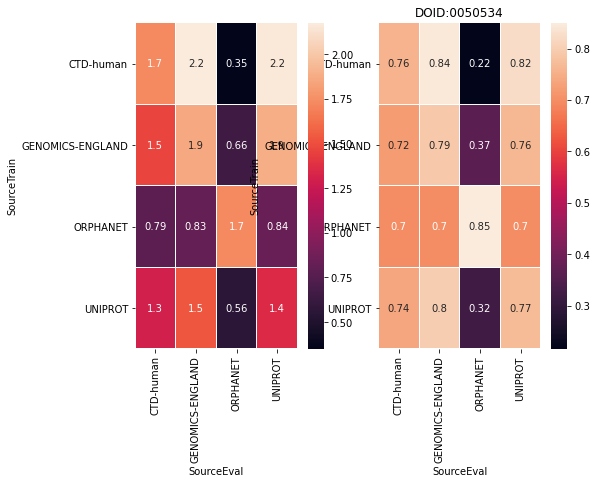

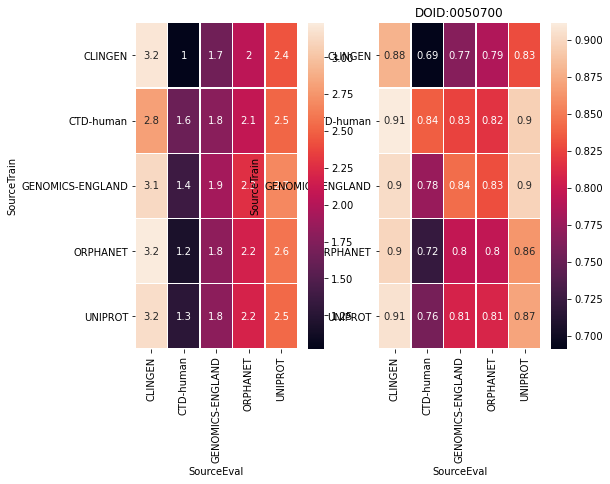

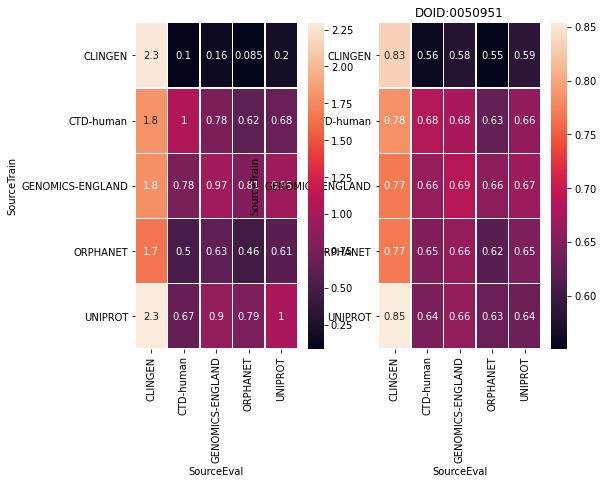

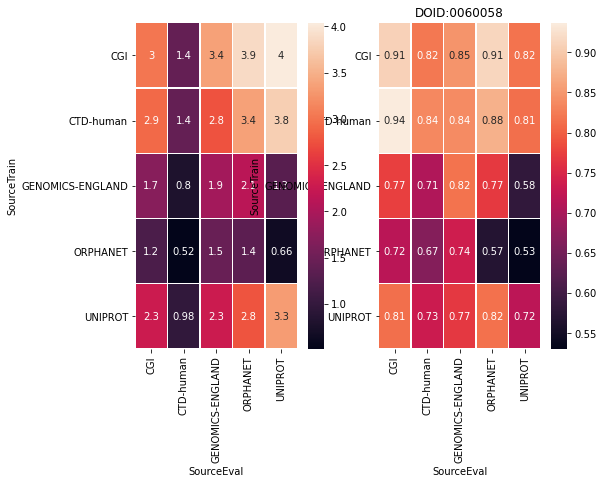

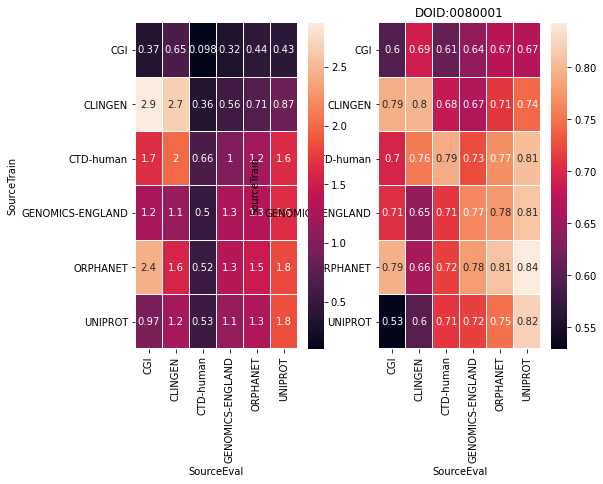

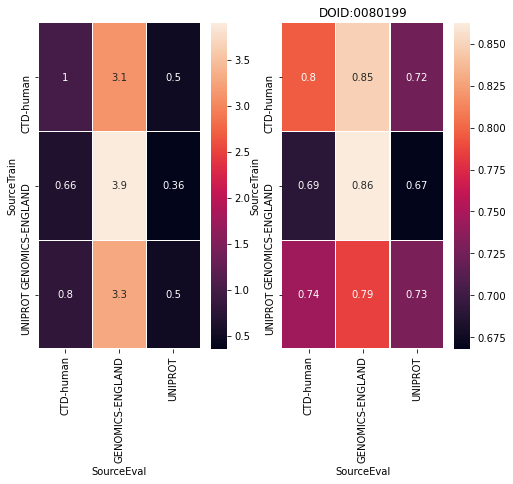

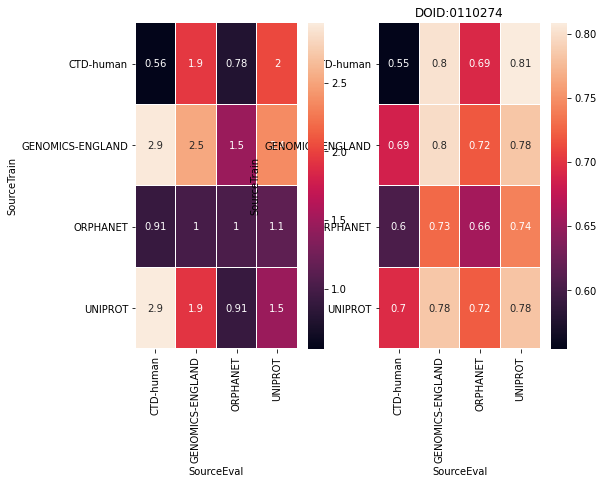

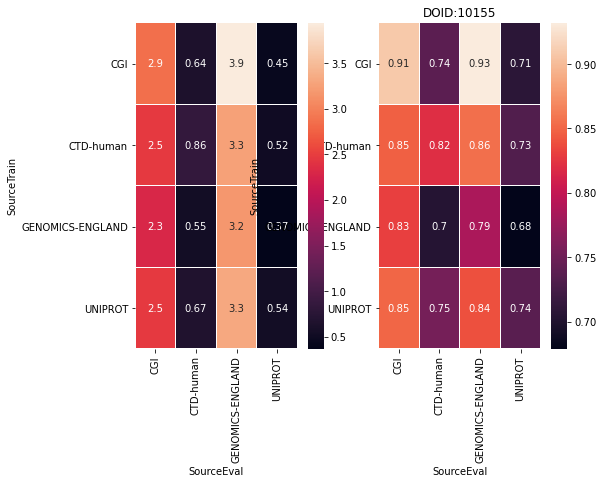

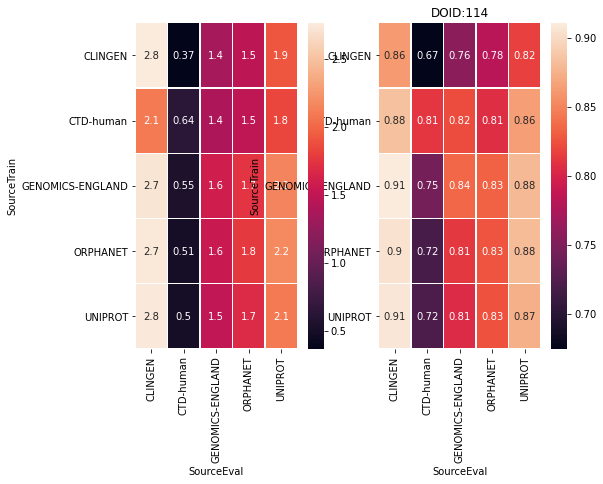

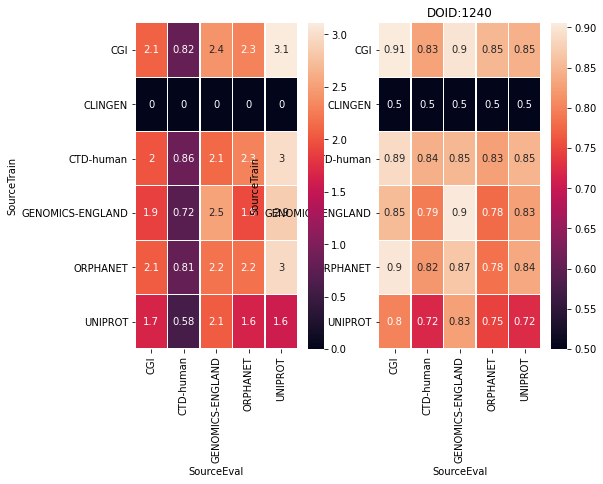

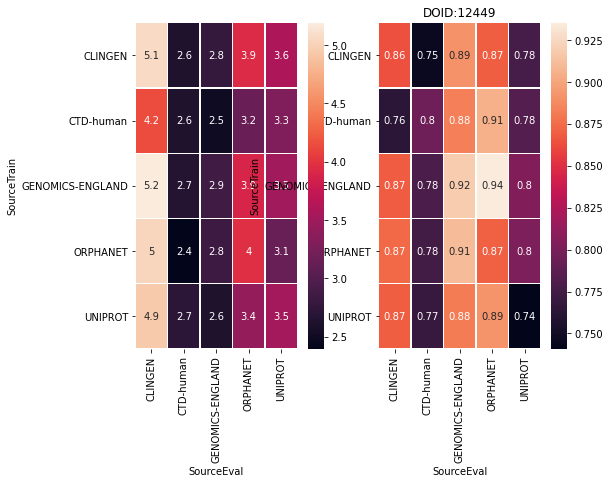

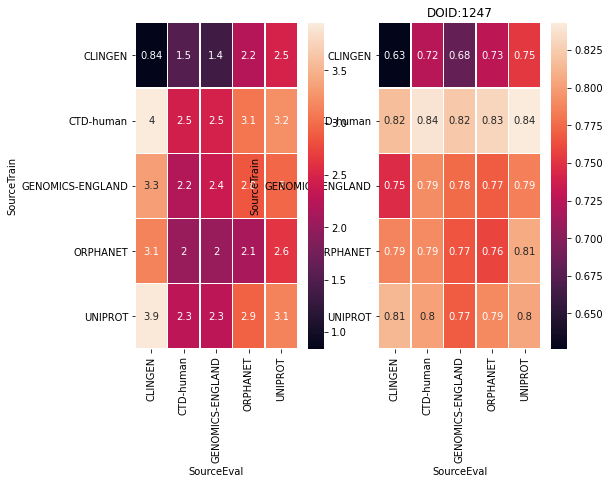

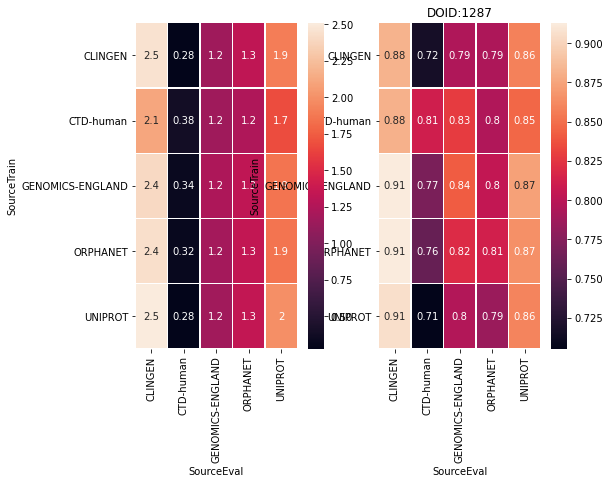

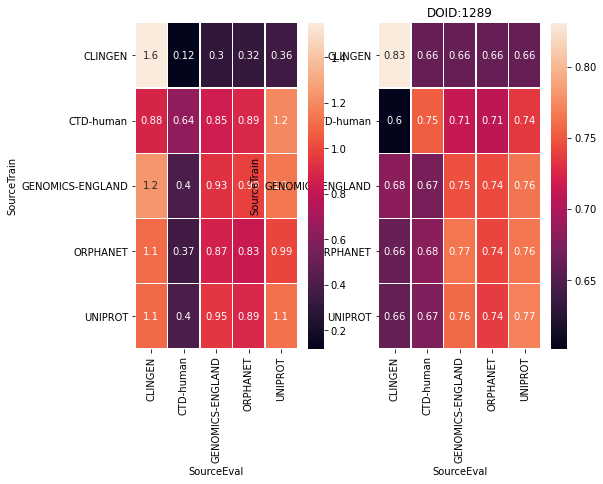

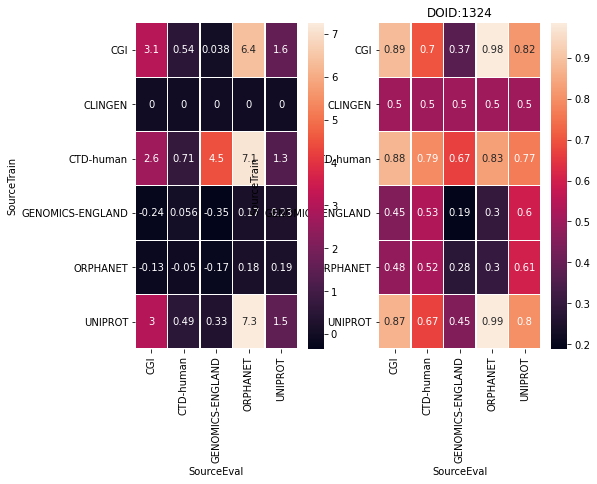

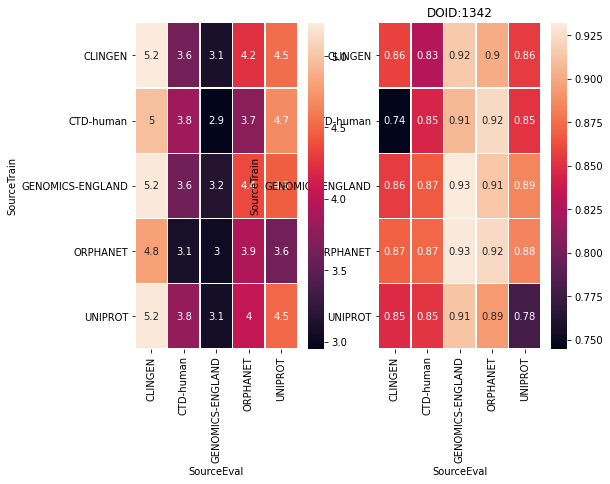

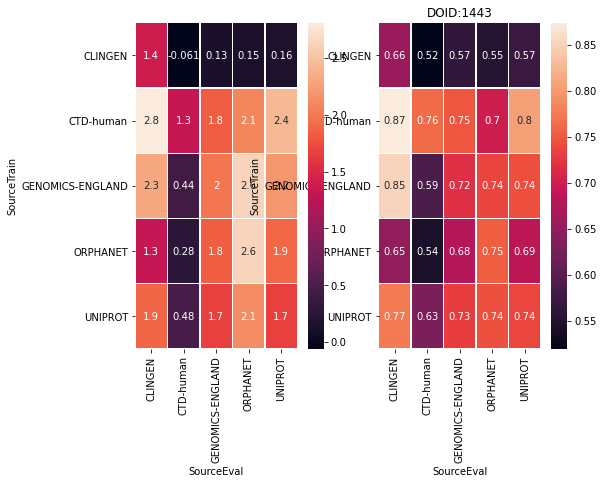

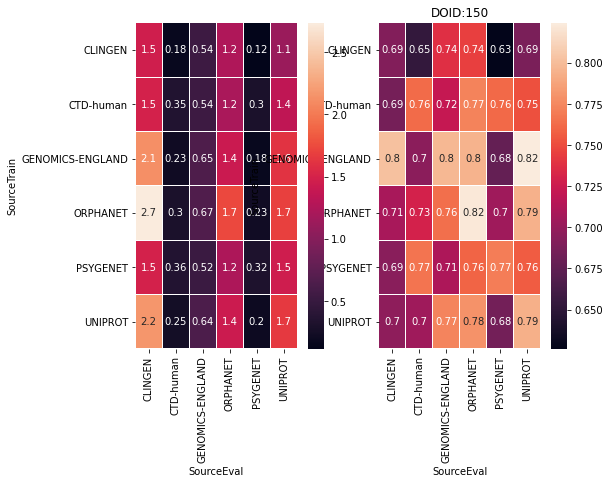

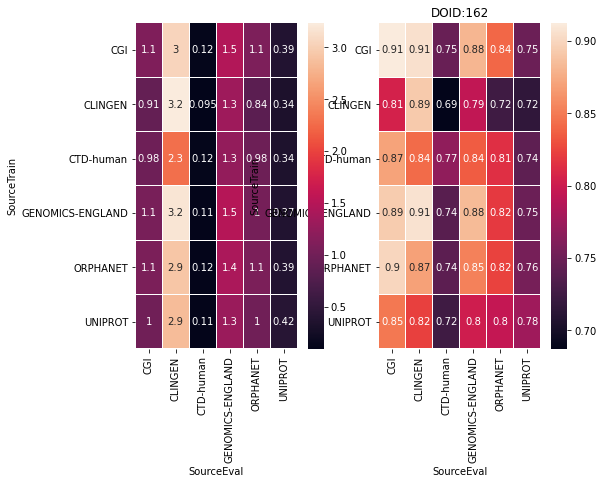

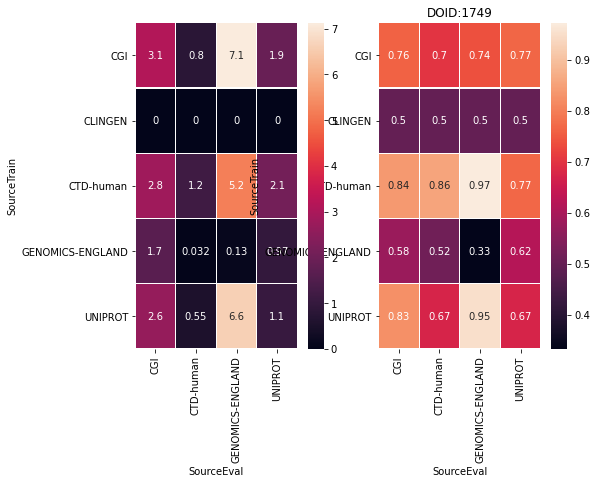

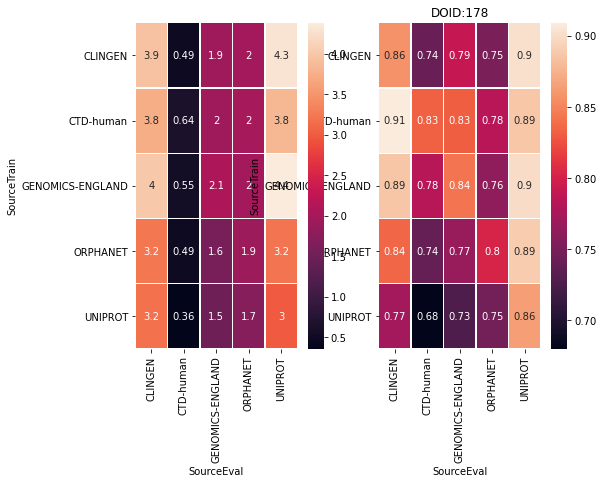

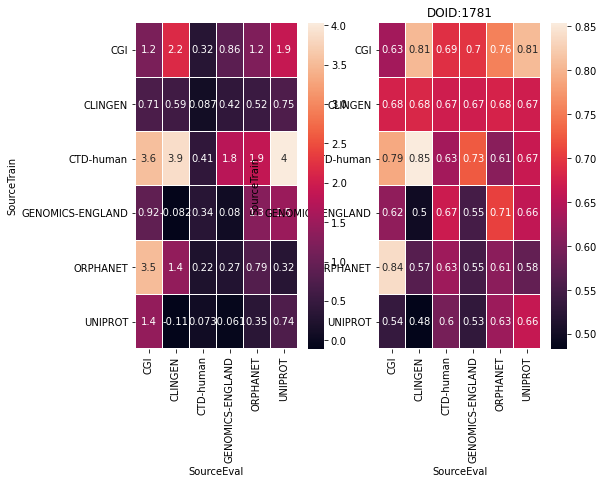

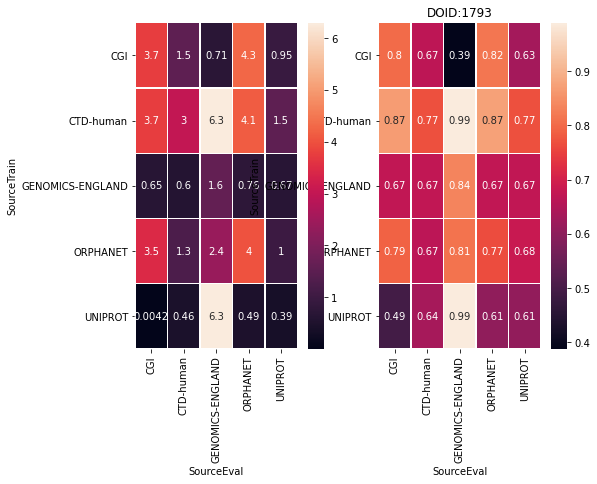

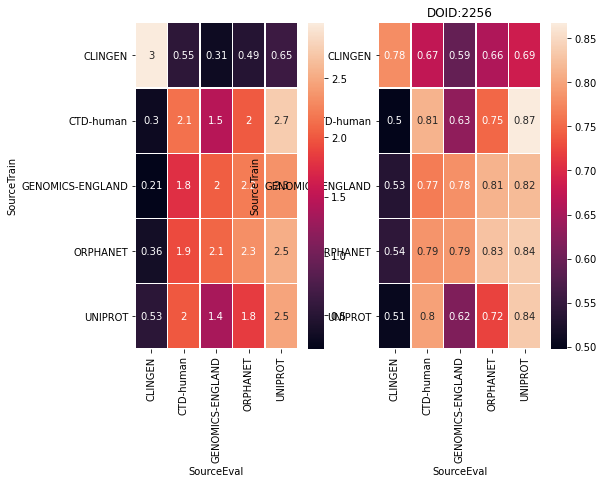

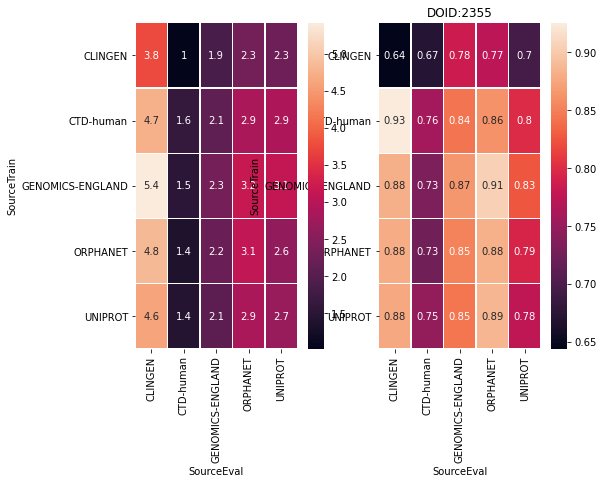

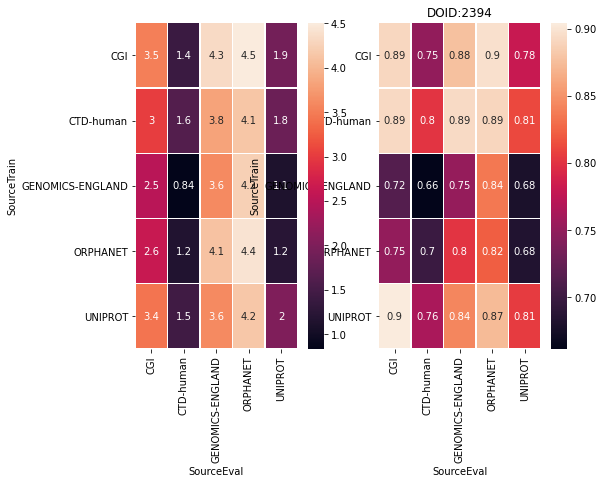

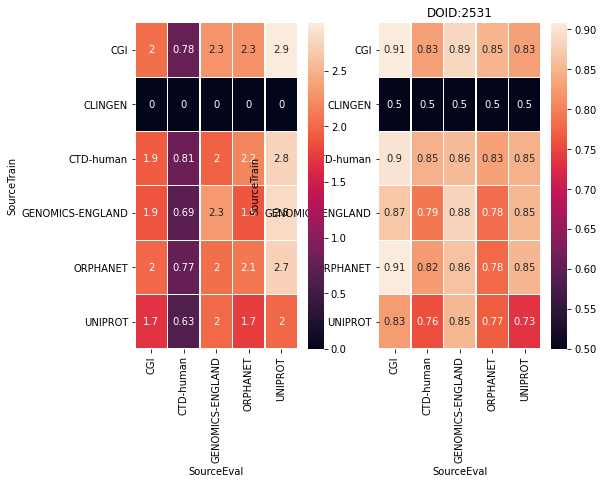

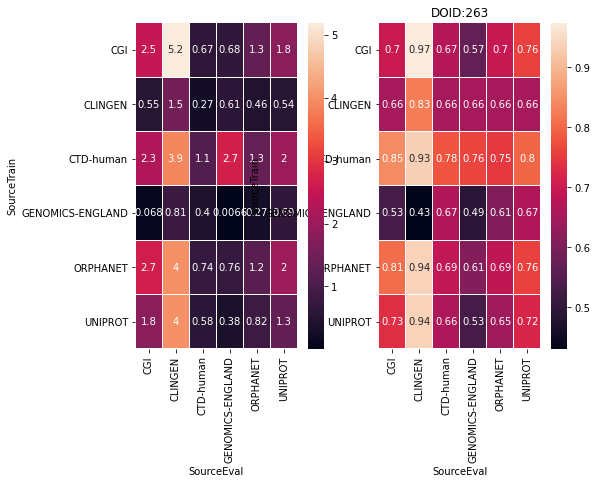

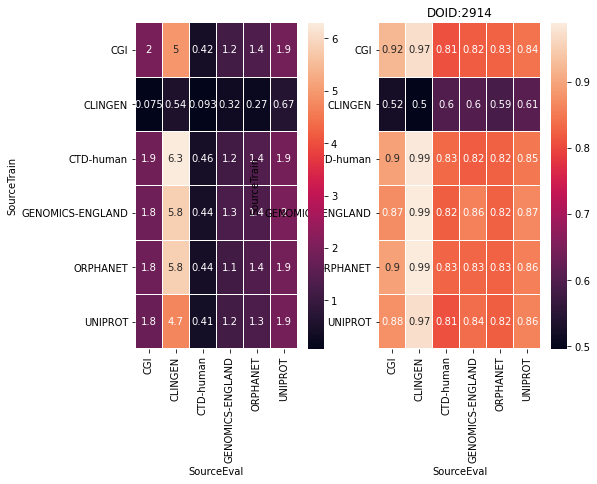

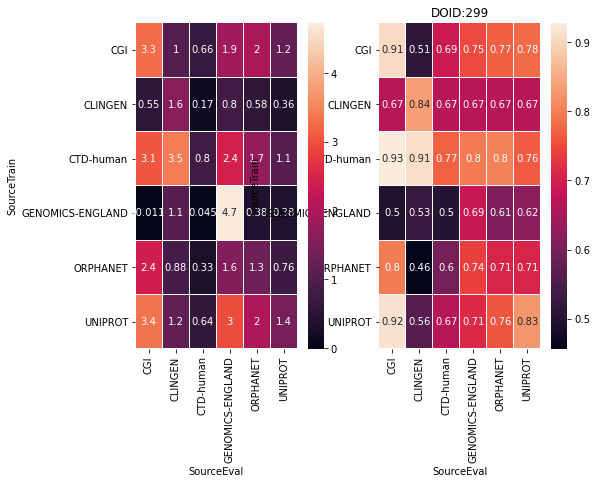

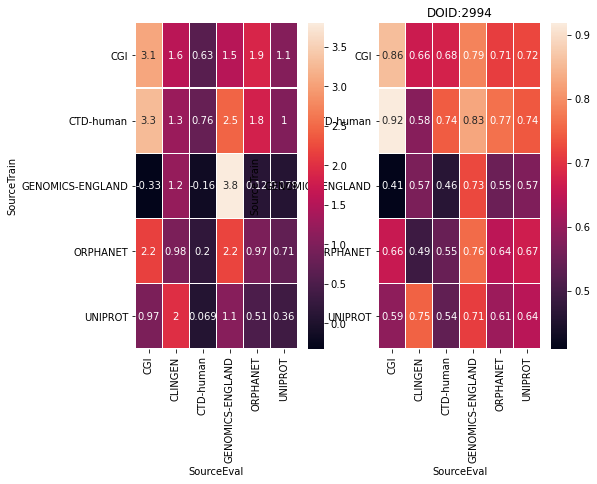

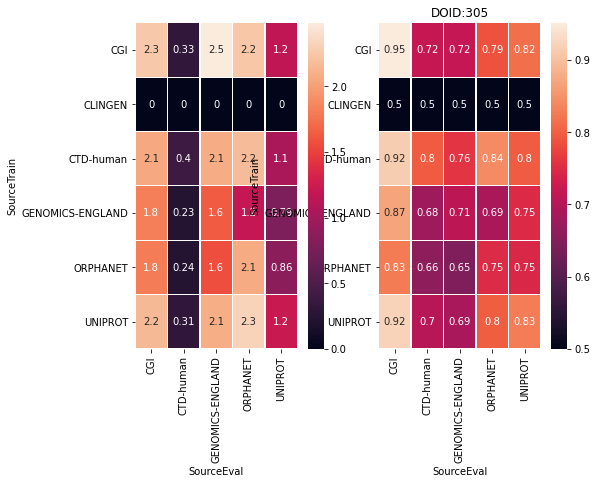

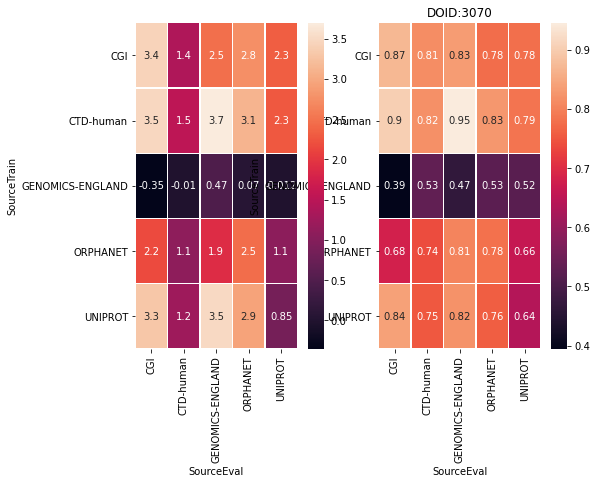

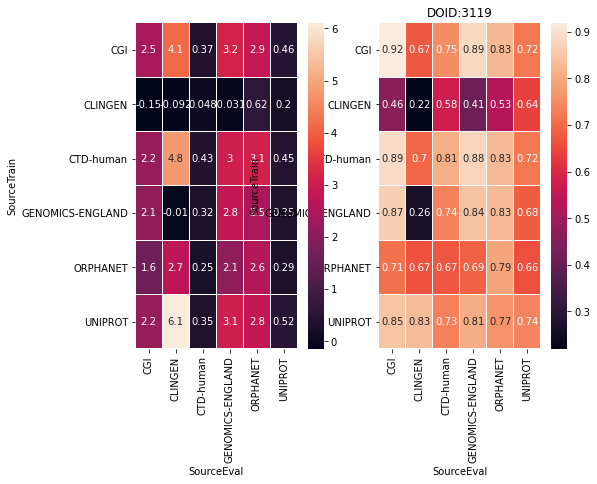

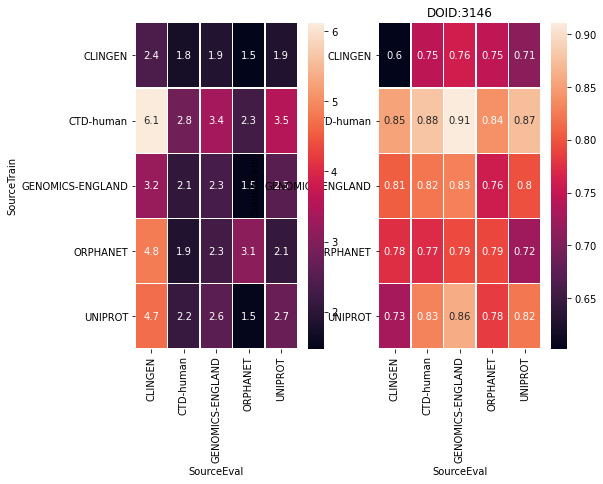

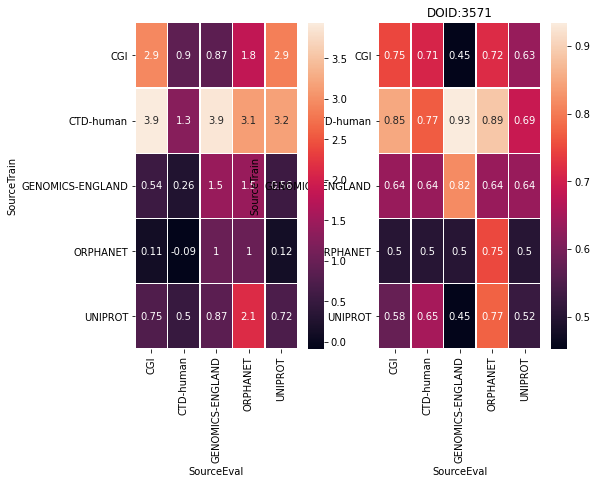

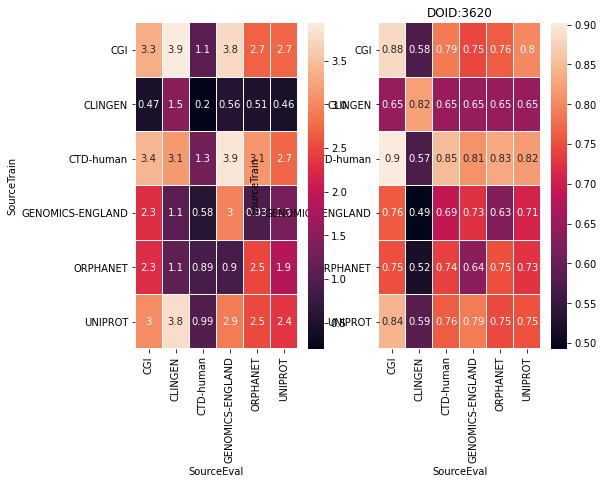

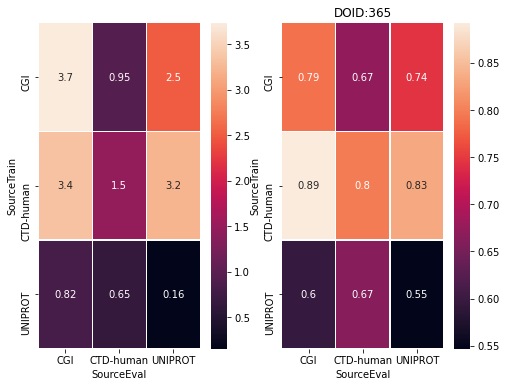

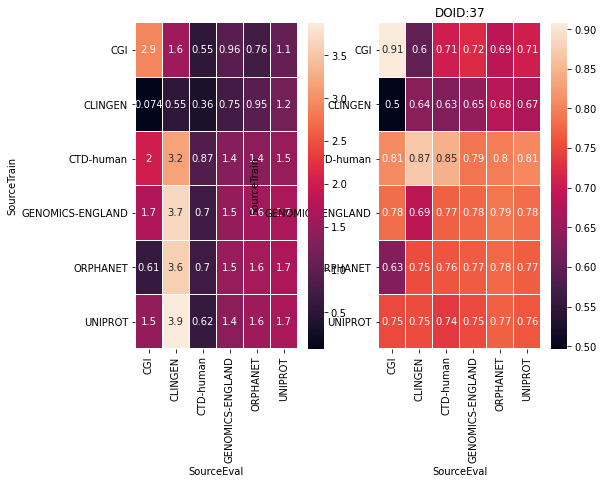

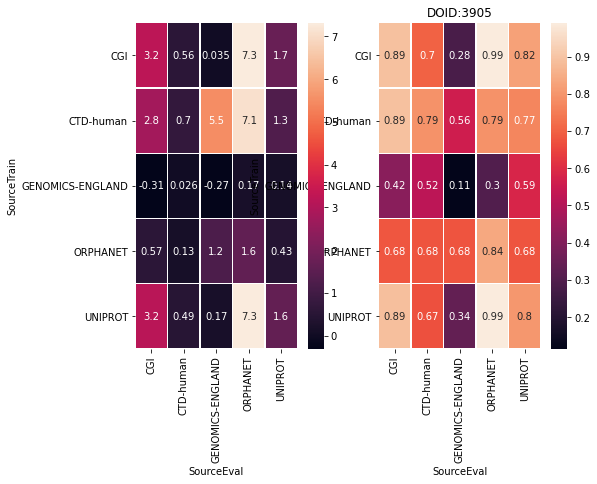

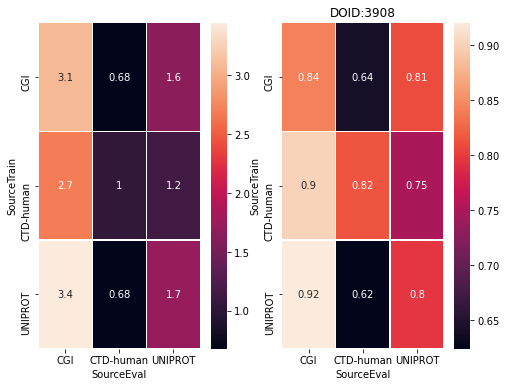

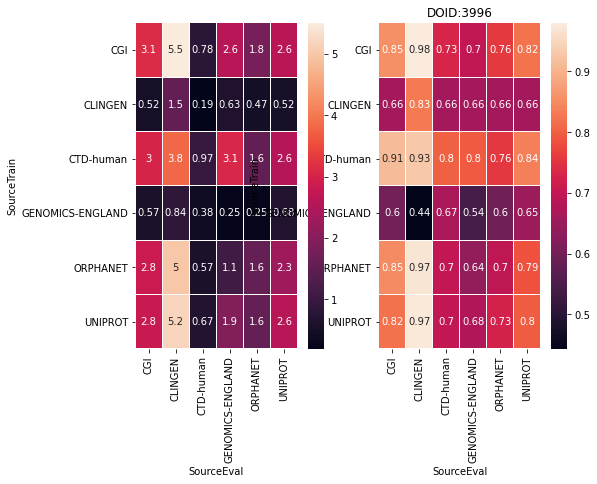

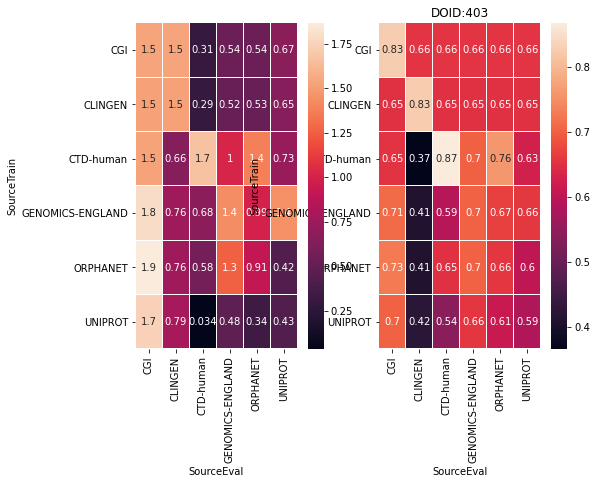

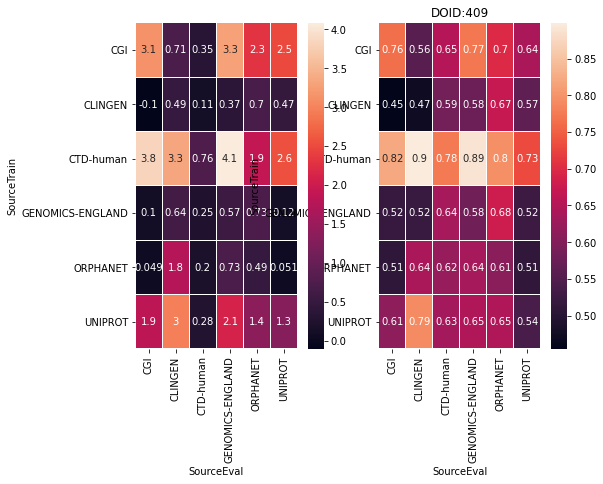

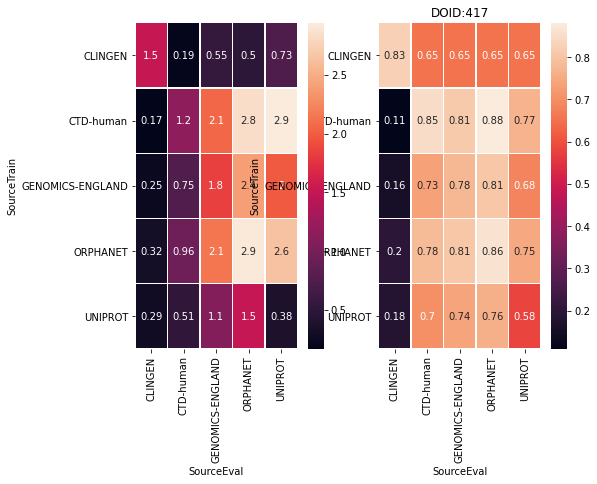

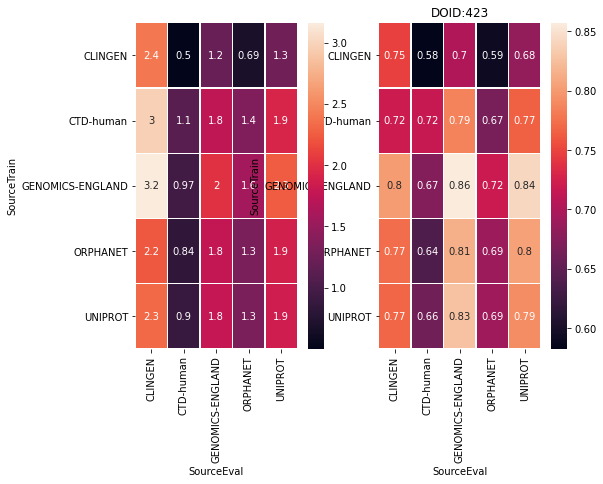

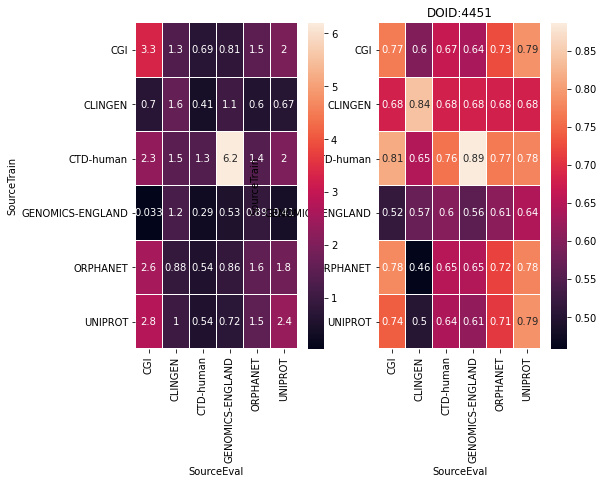

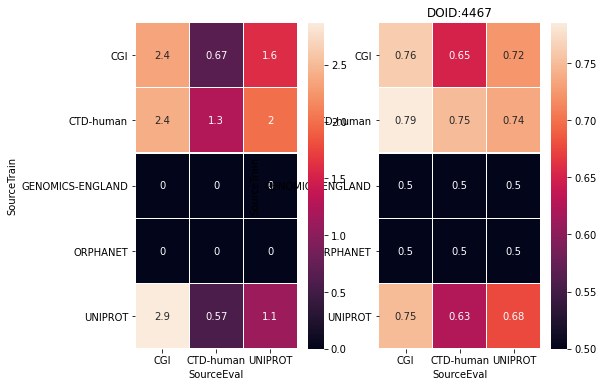

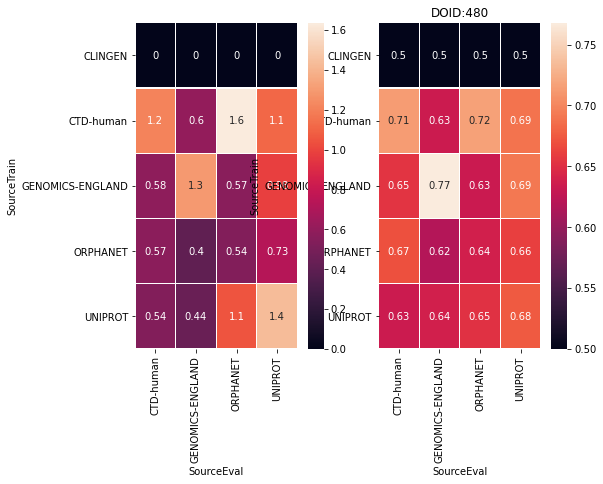

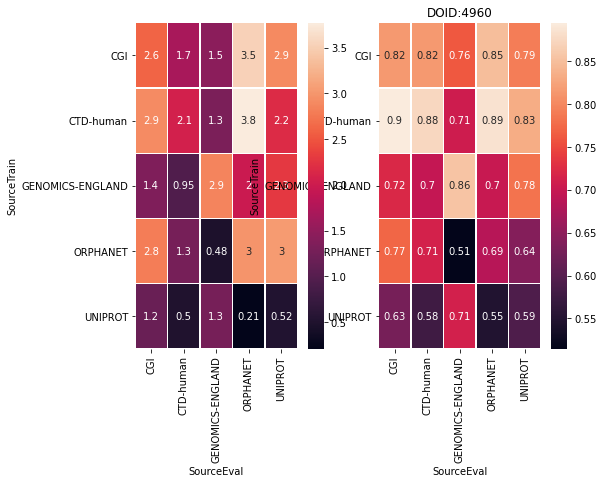

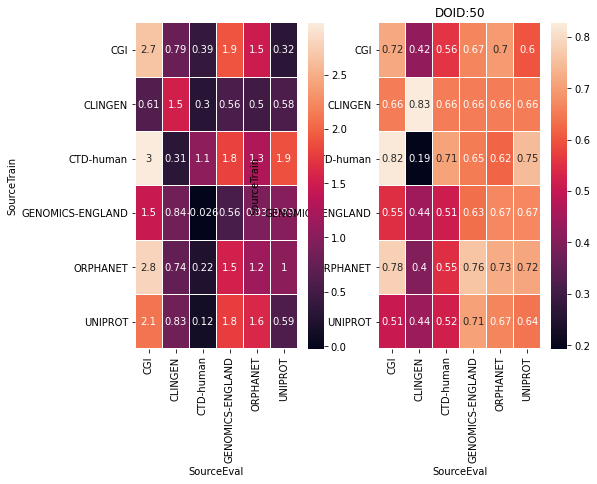

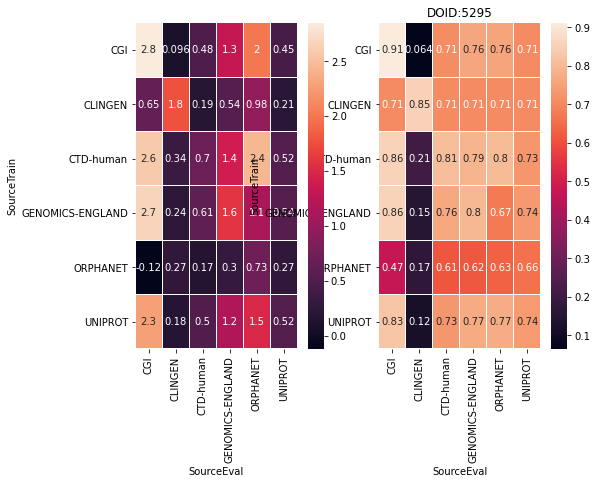

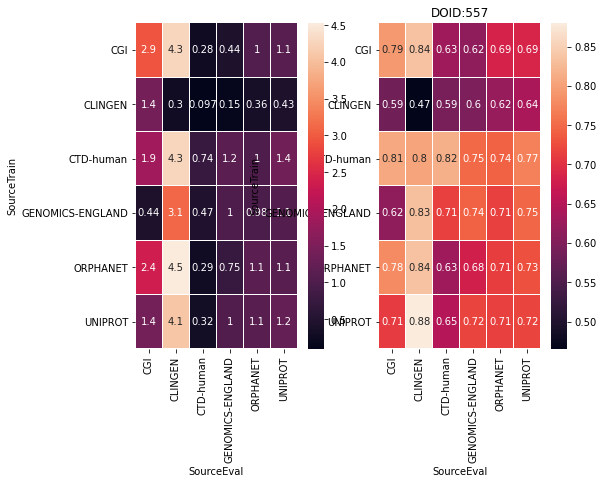

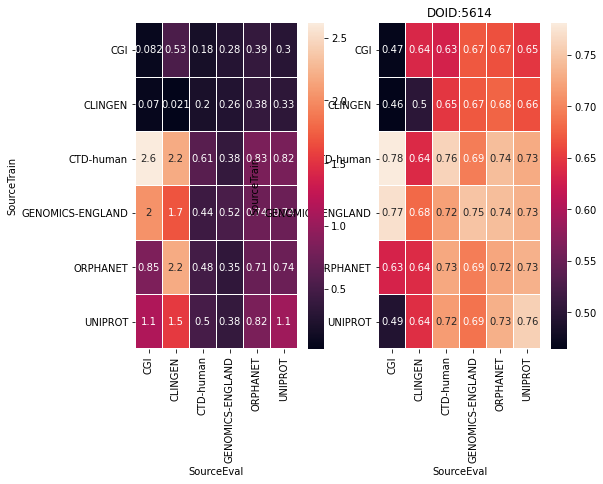

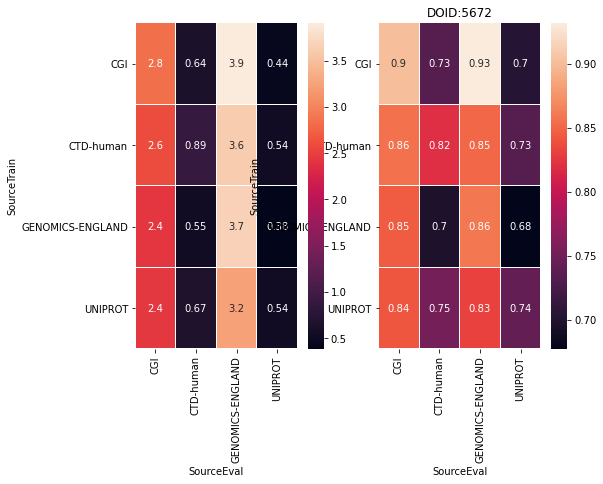

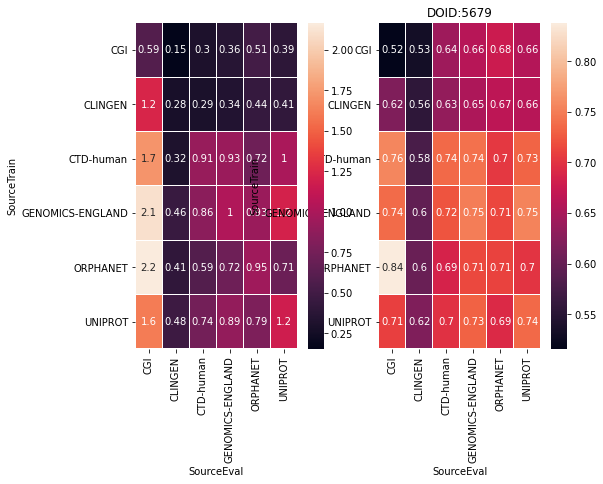

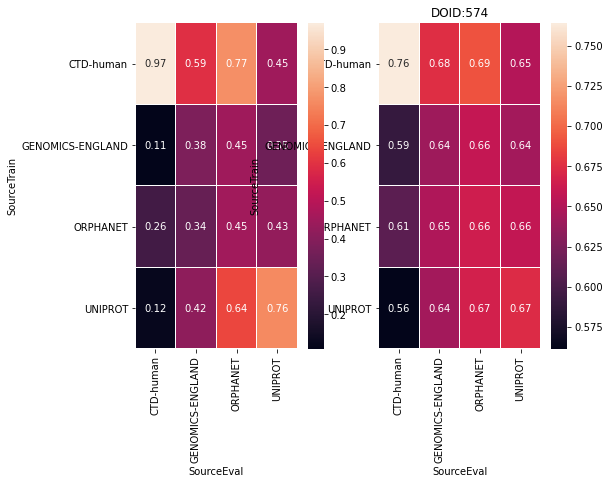

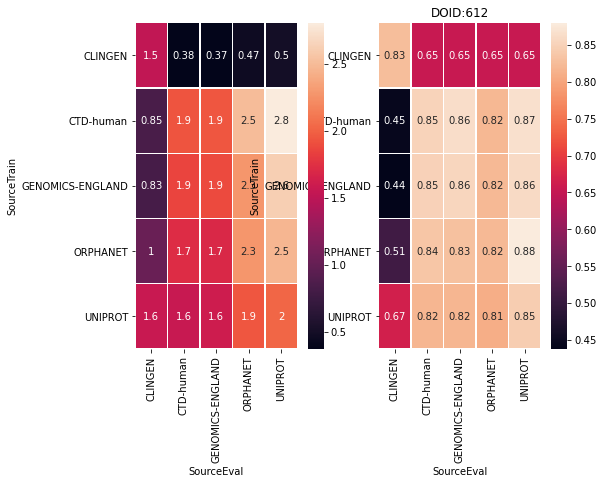

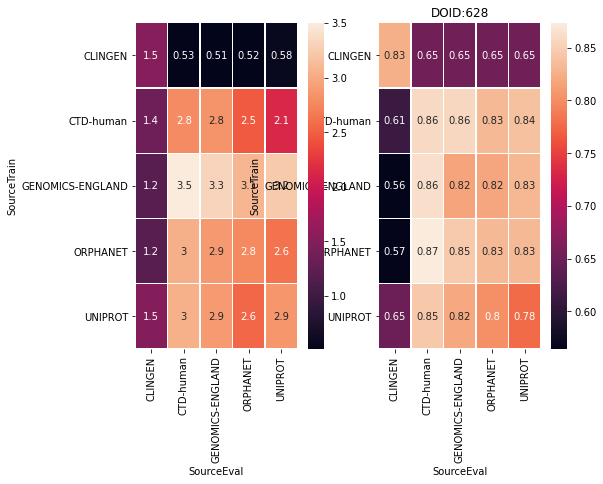

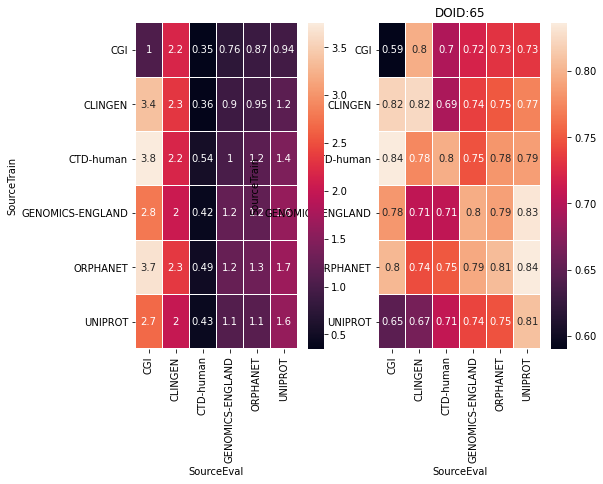

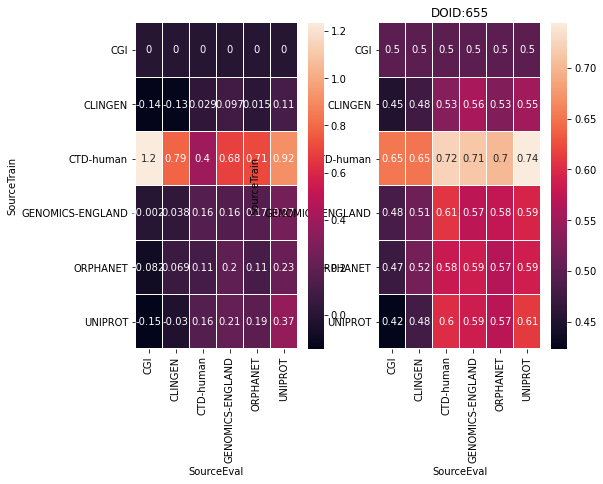

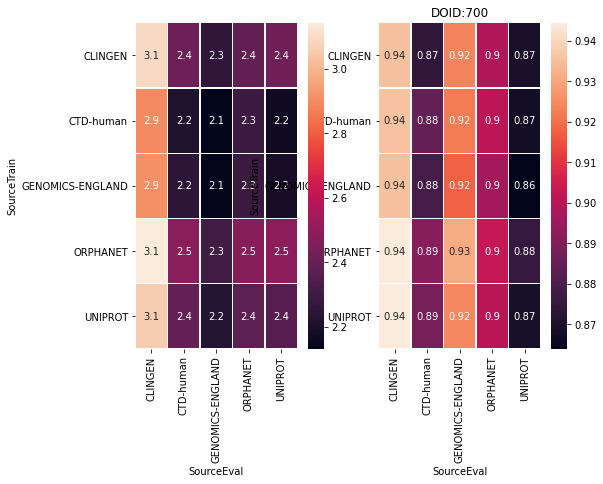

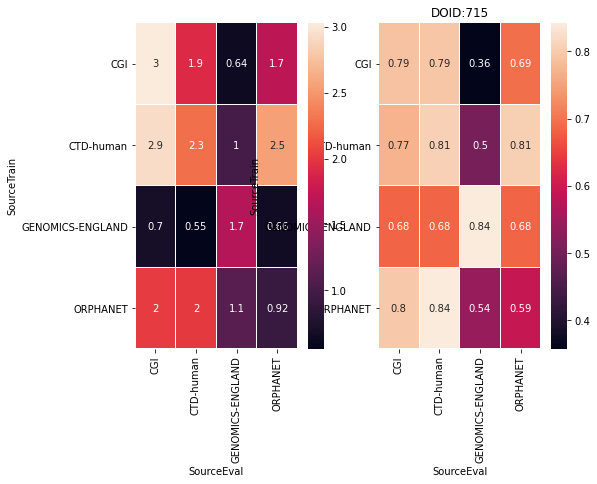

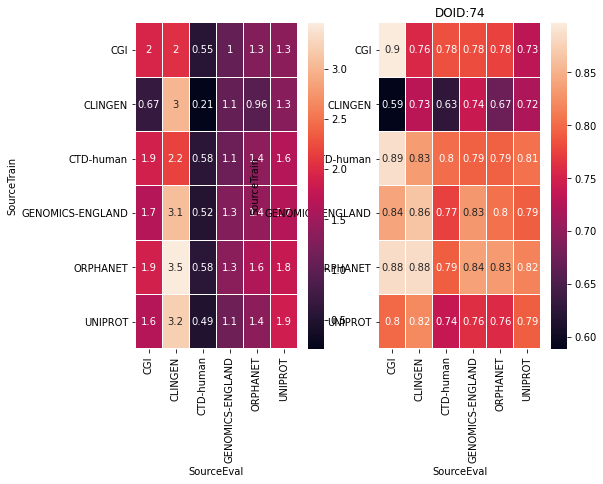

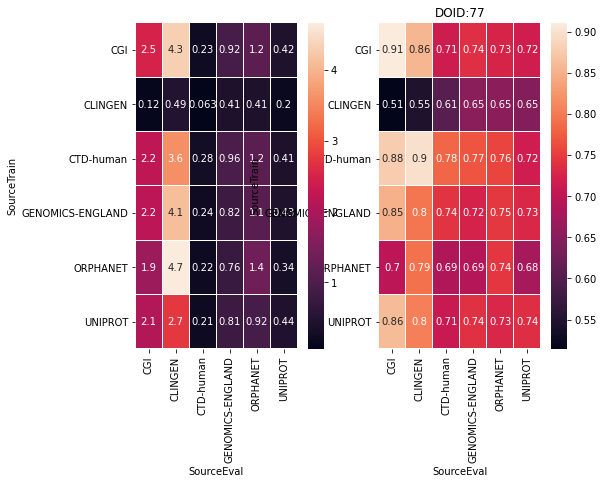

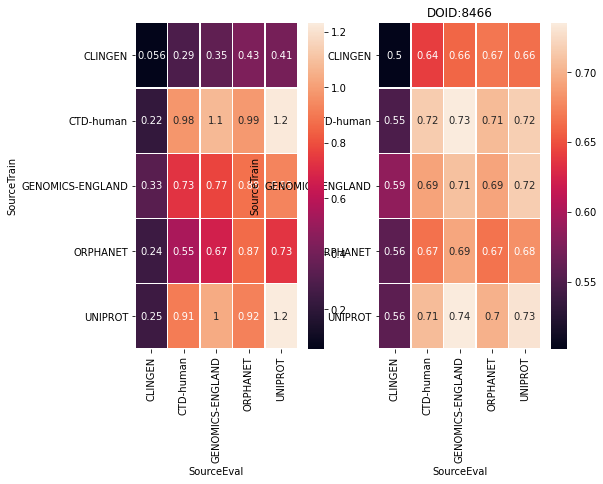

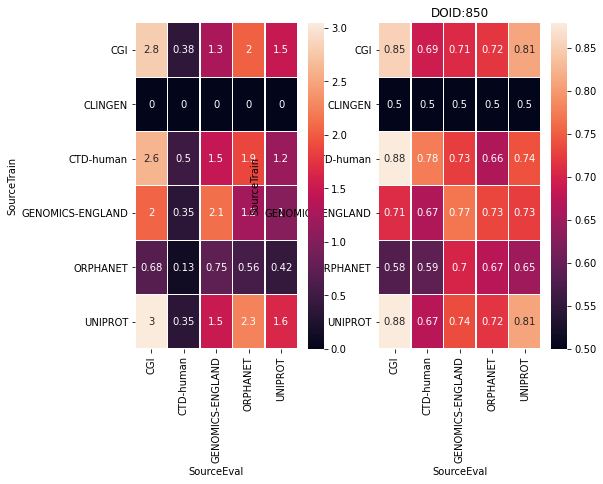

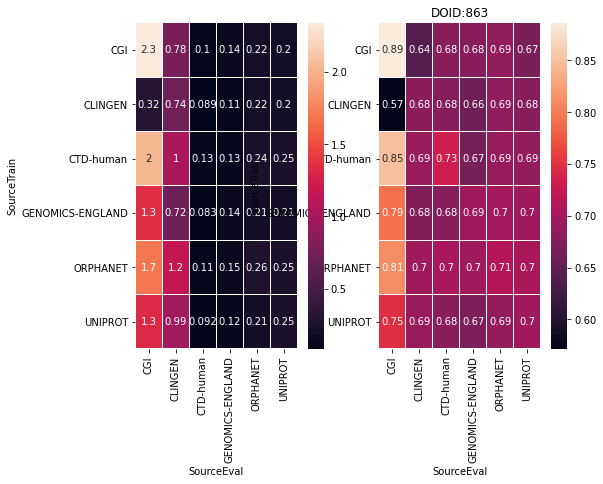

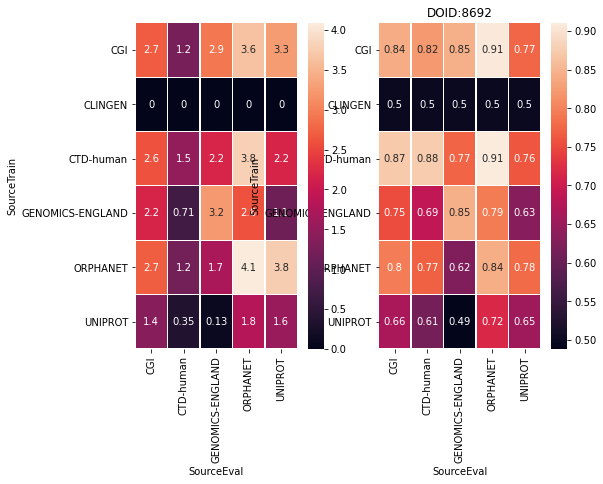

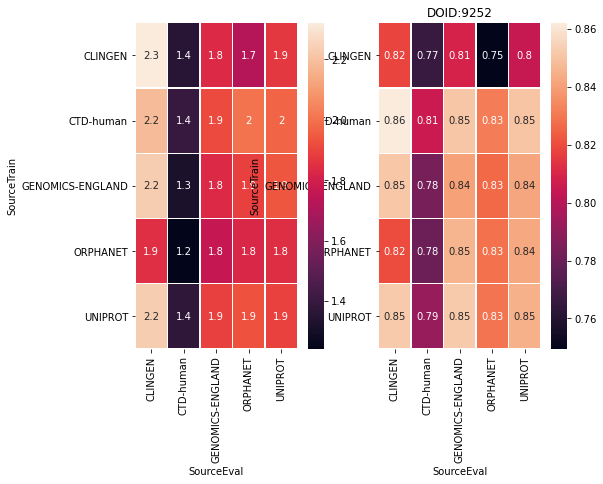

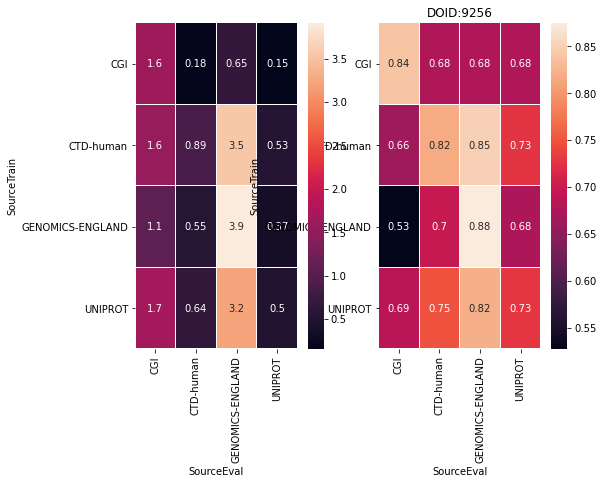

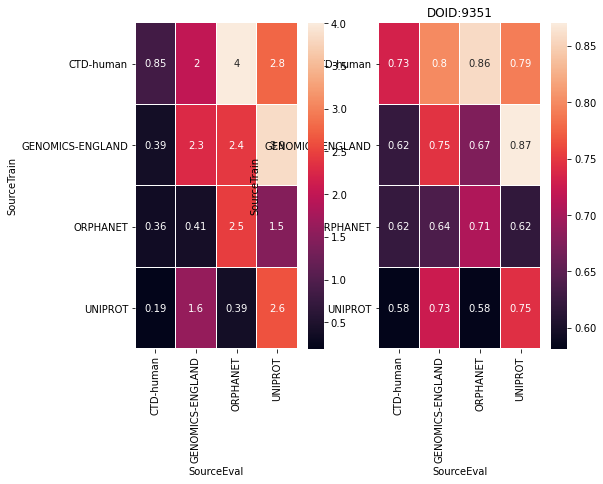

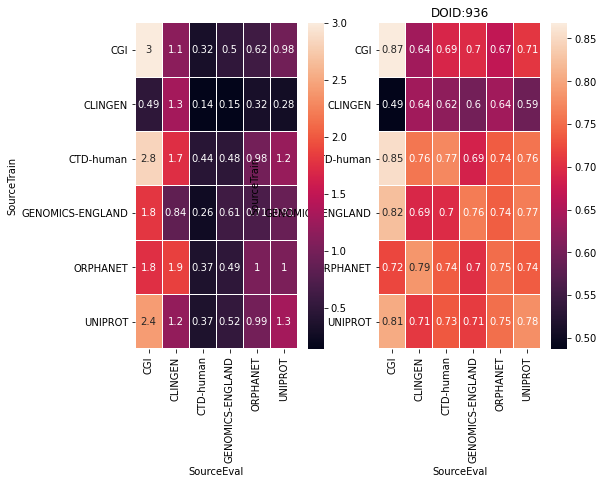

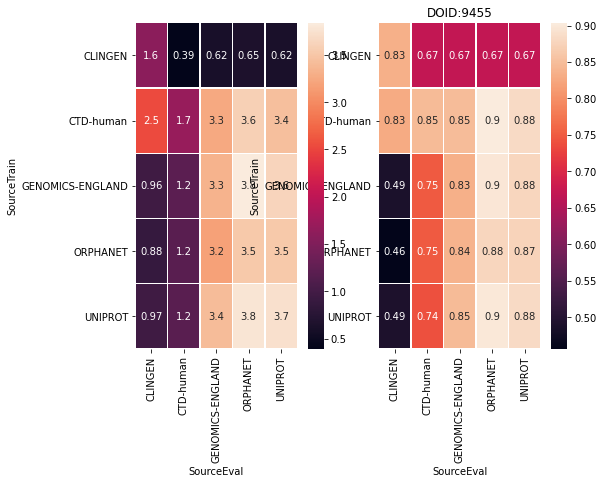

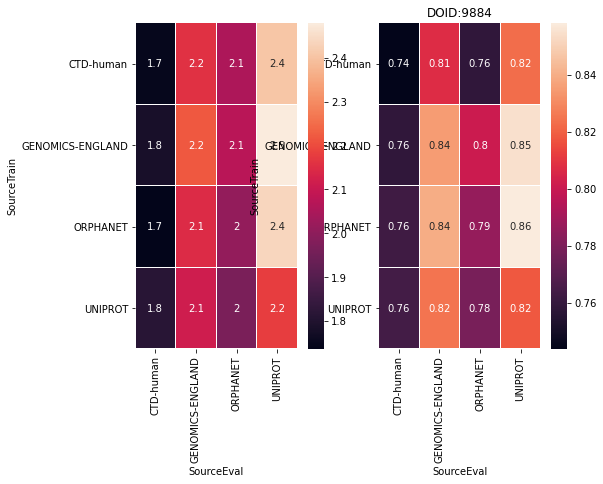

In [9]:
dict_of_DOIDS = dict(iter(df.groupby('DOID')))

for DOID in dict_of_DOIDS:
    resultLog = dict_of_DOIDS[DOID].pivot("SourceTrain", "SourceEval", "log2(auPRC/prior)")
    resultauROC = dict_of_DOIDS[DOID].pivot("SourceTrain", "SourceEval", "auROC")
    plt.rcParams["figure.figsize"] = [8, 6]
    fig, axes = plt.subplots(1, 2)
    #fig, ax = plt.subplots(figsize=(8,6))   
    sns.heatmap(resultLog, annot = True, linewidths = .25, ax=axes[0])
    sns.heatmap(resultauROC, annot = True, linewidths = .25, ax=axes[1])
    plt.title(DOID)
    plt.show()

<ipython-input-4-1e7b3e9516d9>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(8,6))


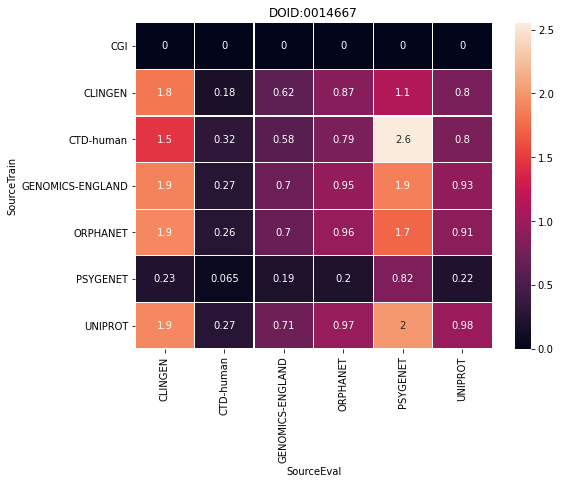

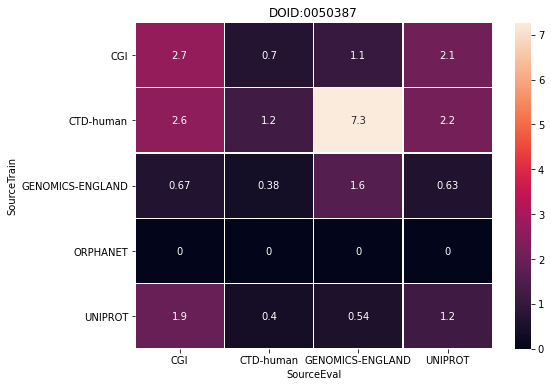

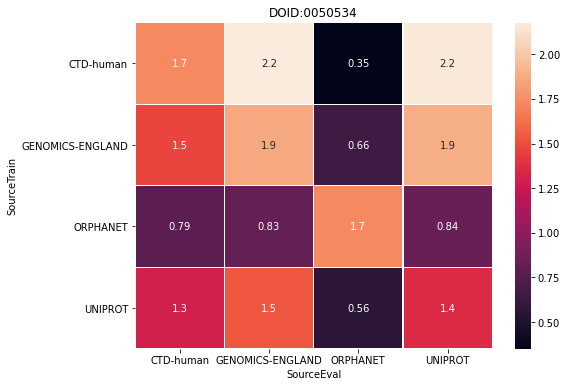

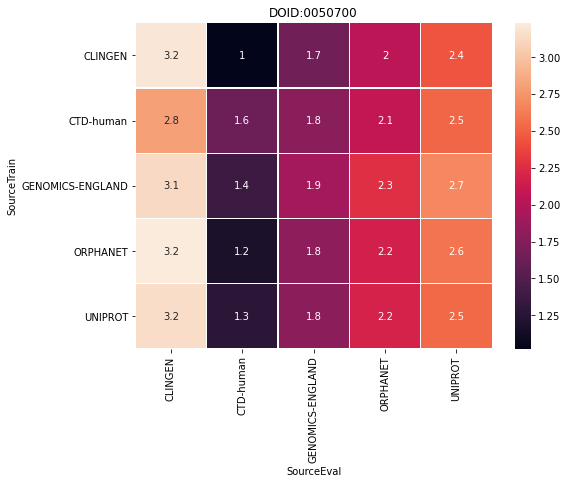

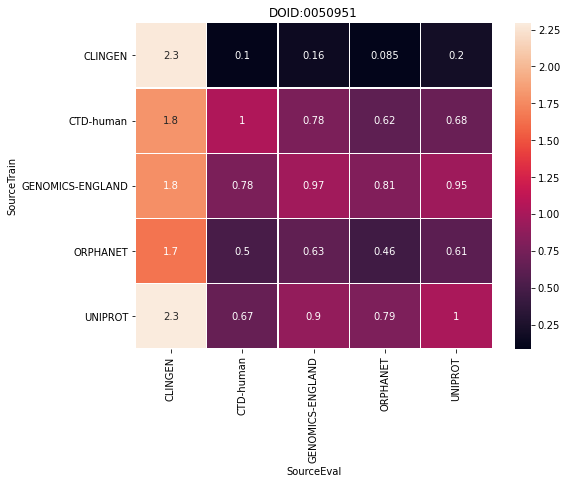

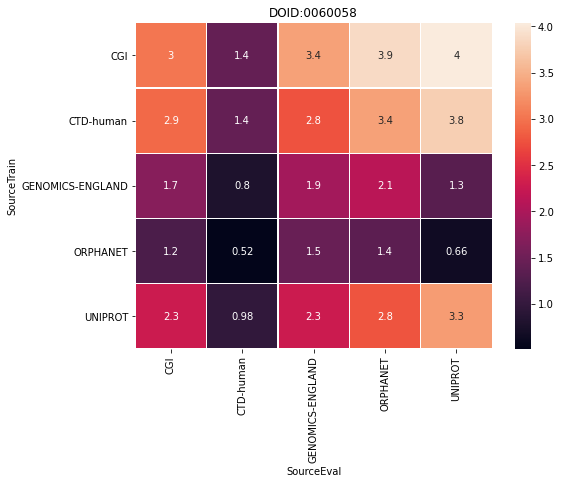

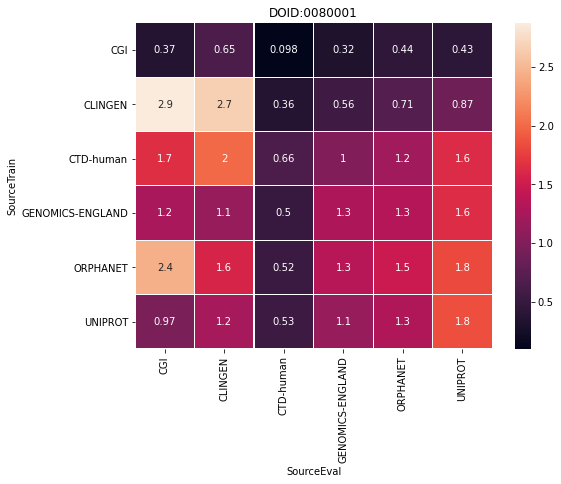

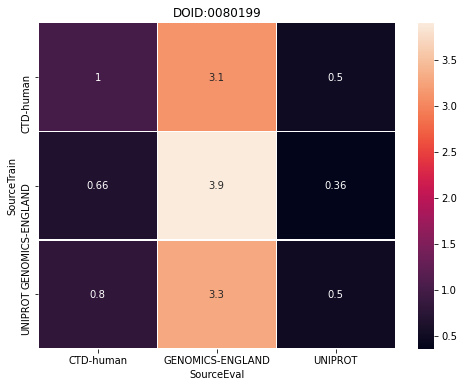

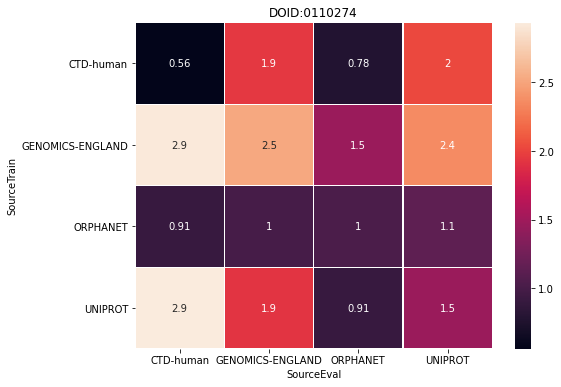

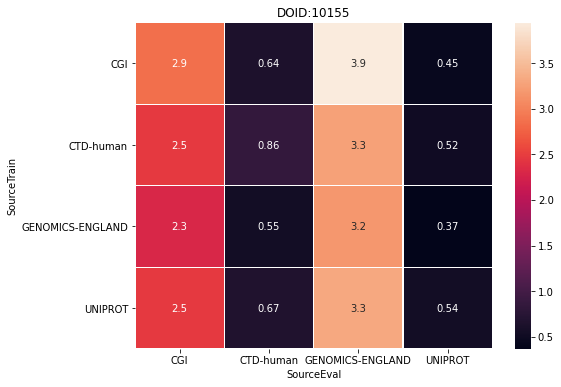

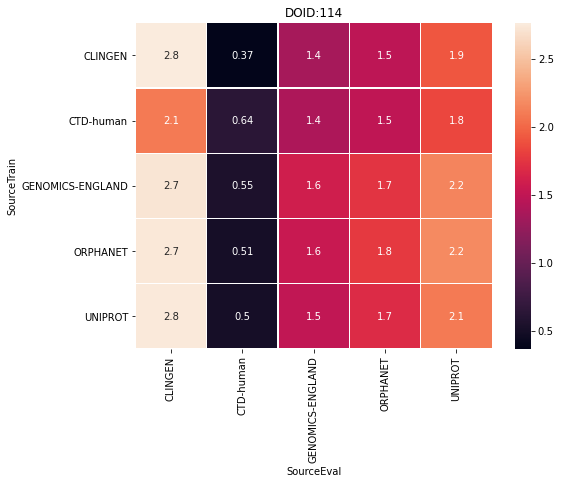

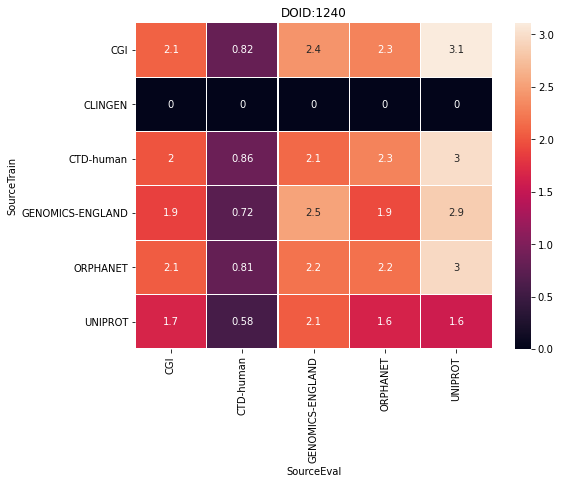

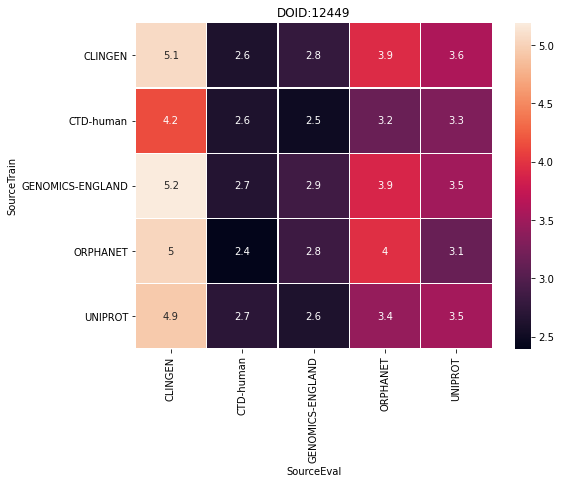

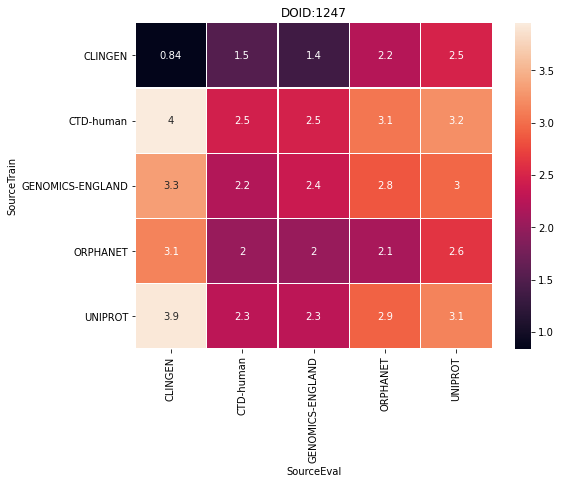

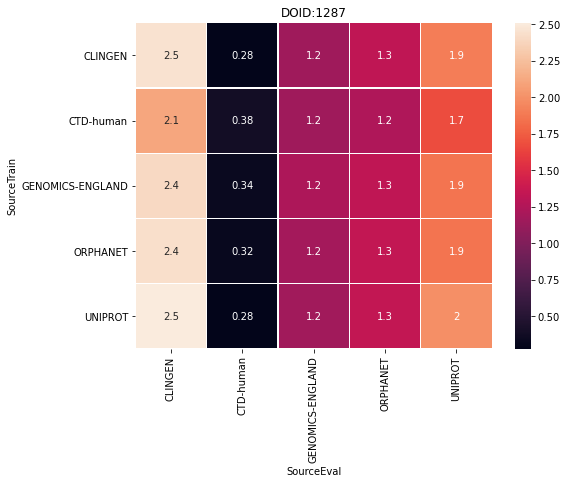

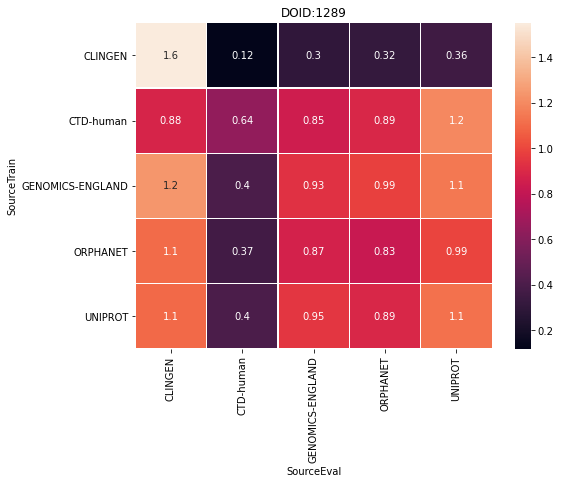

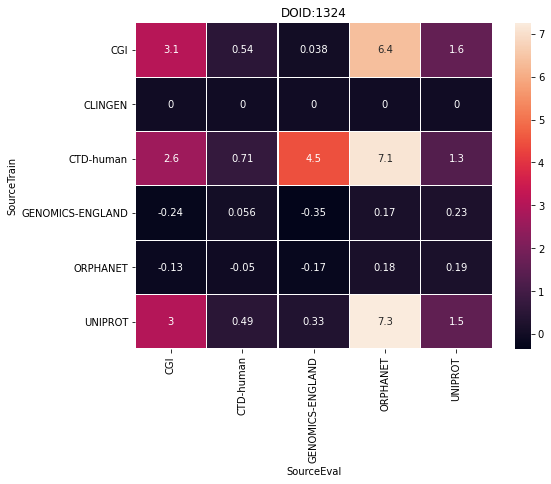

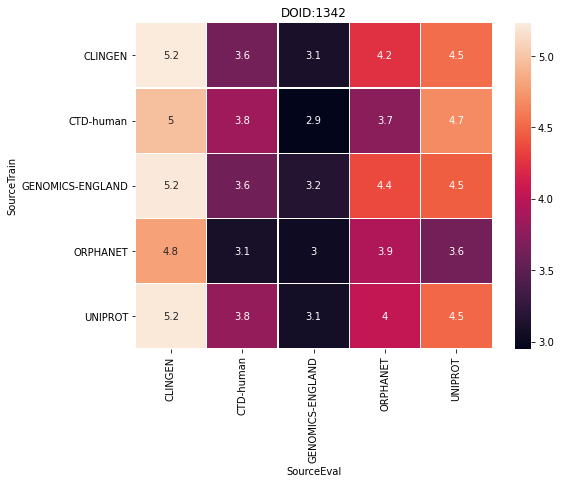

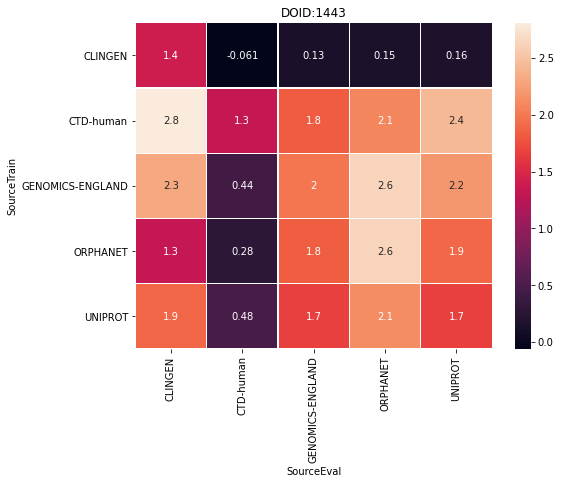

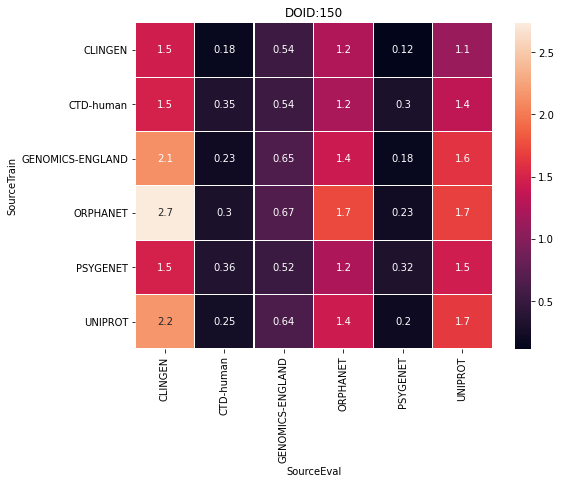

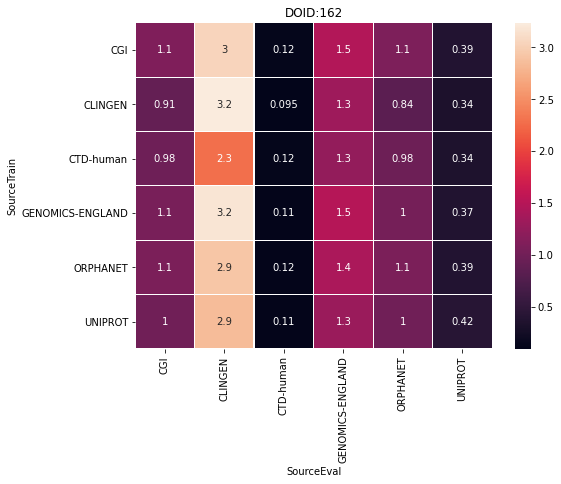

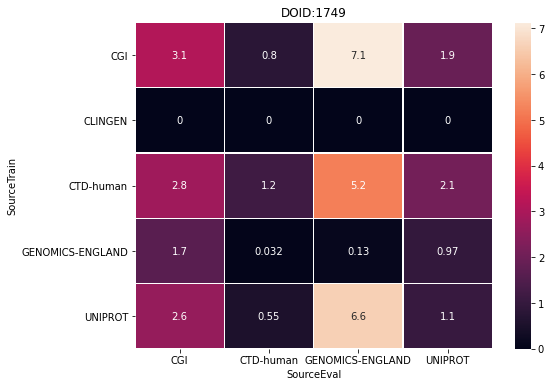

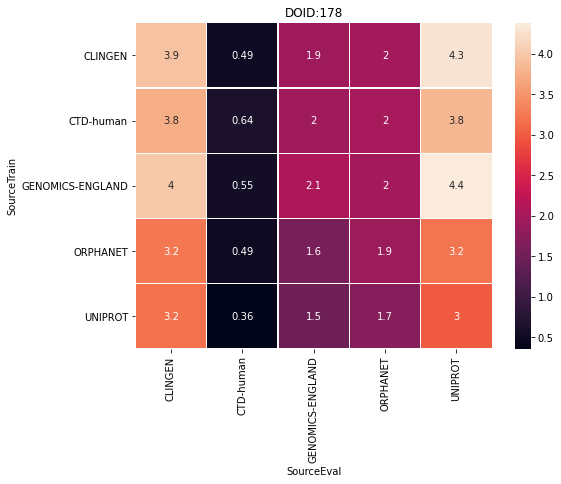

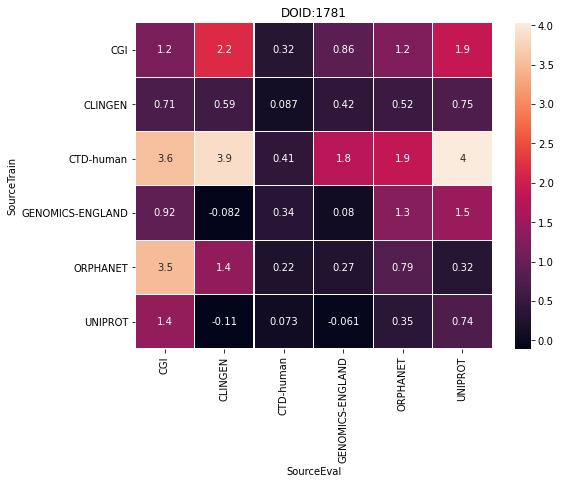

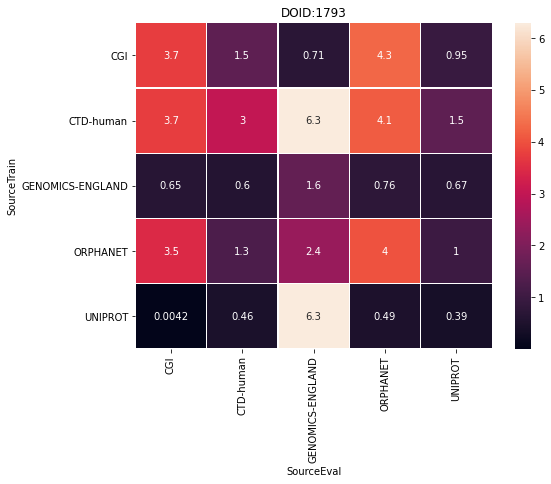

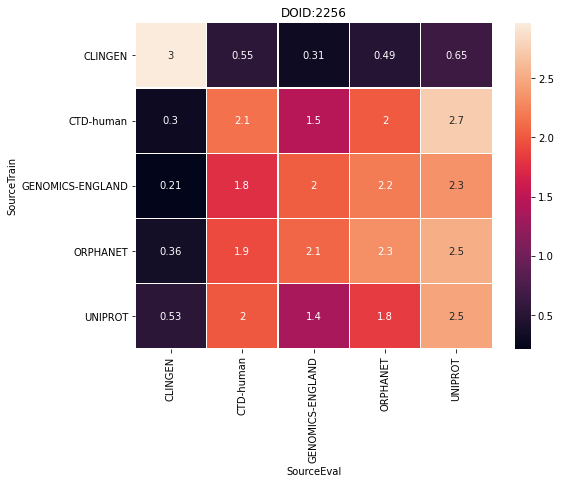

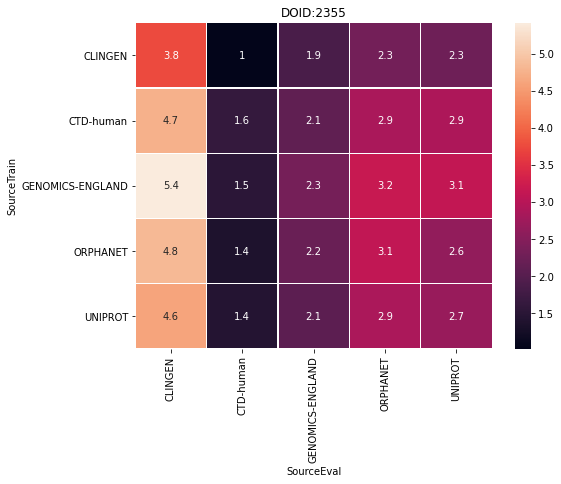

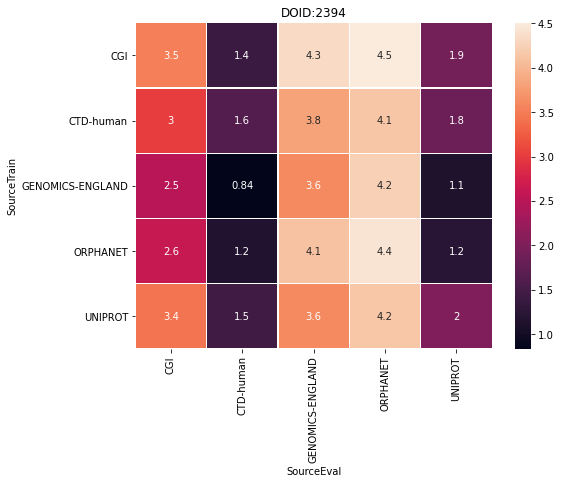

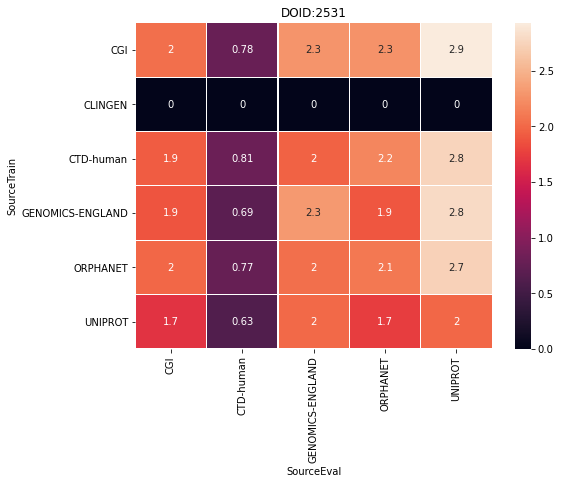

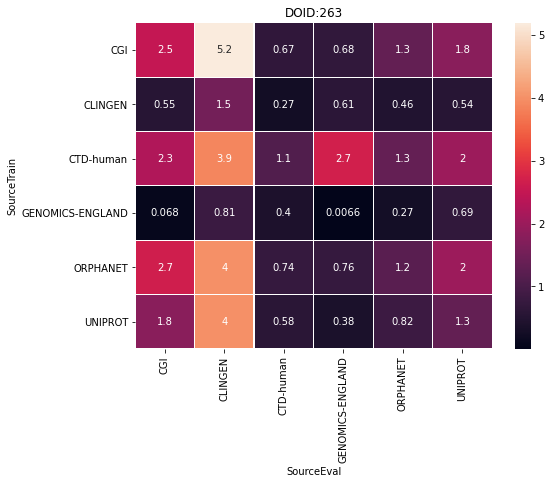

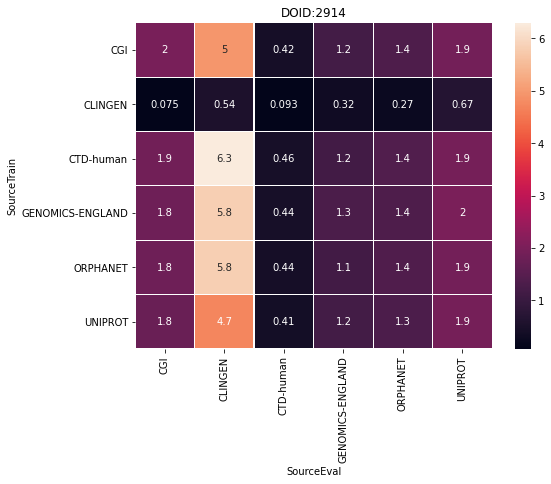

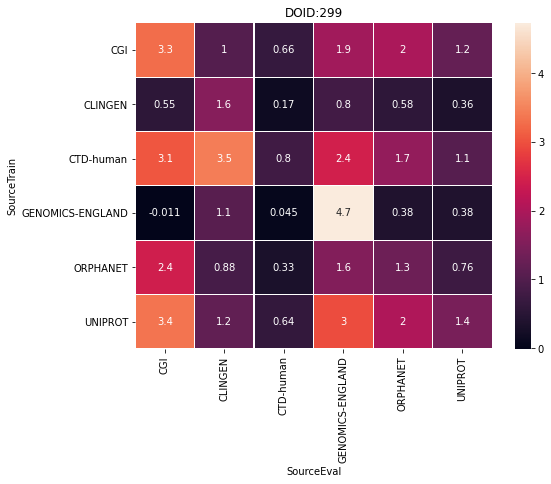

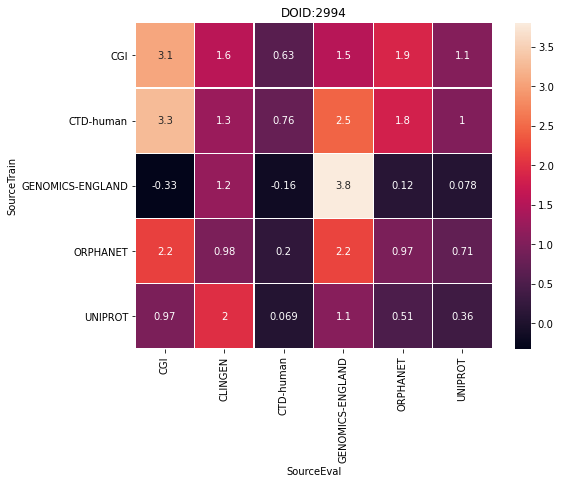

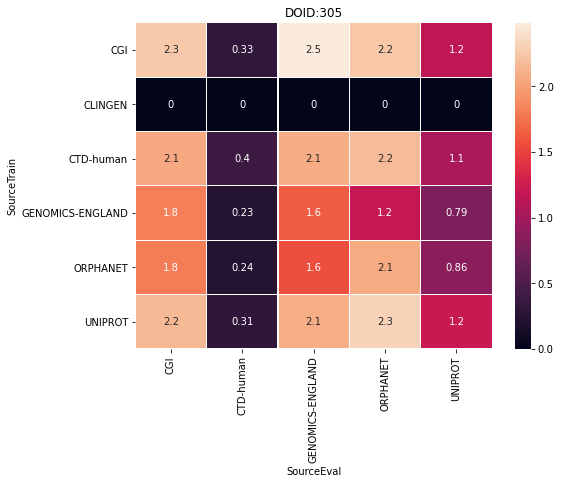

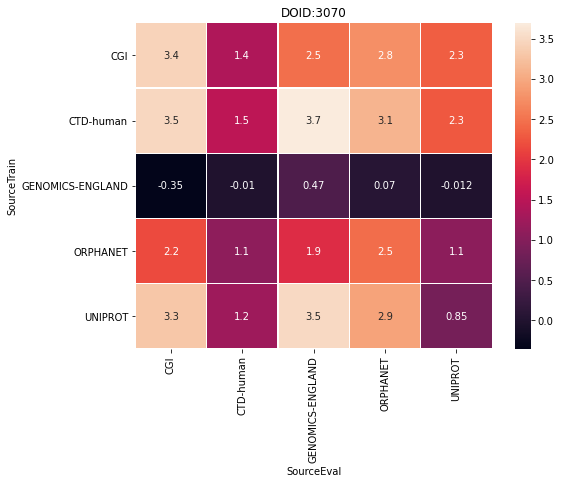

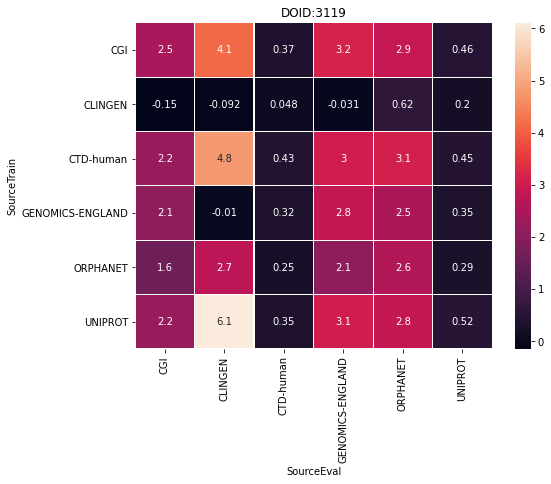

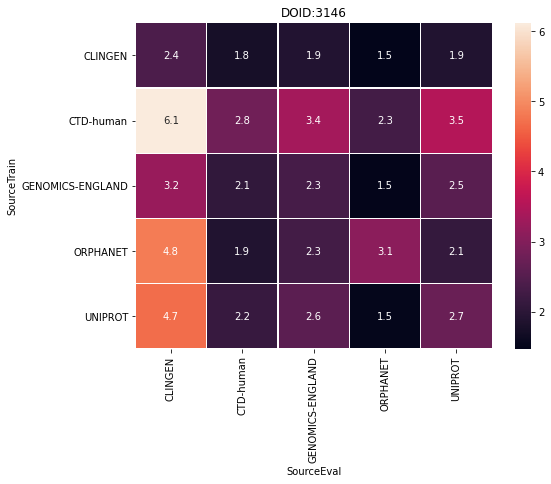

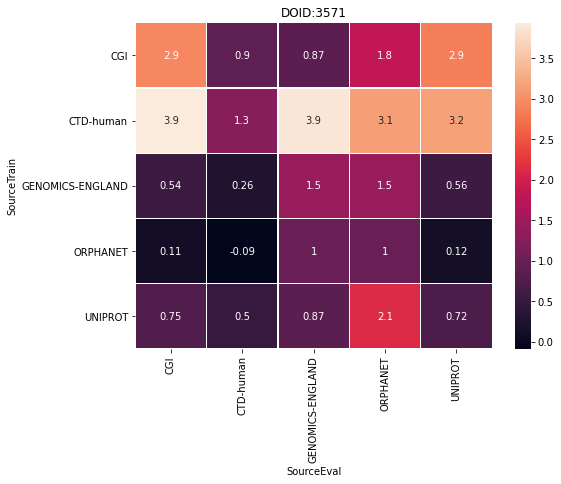

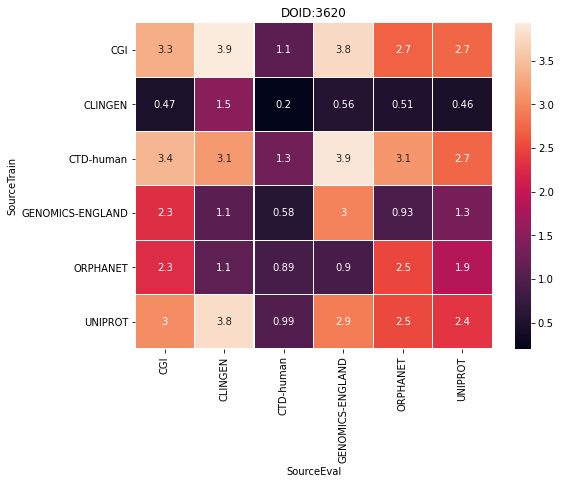

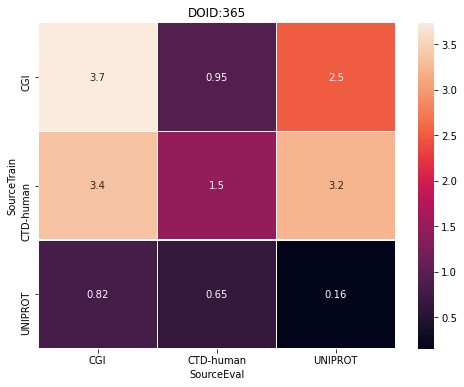

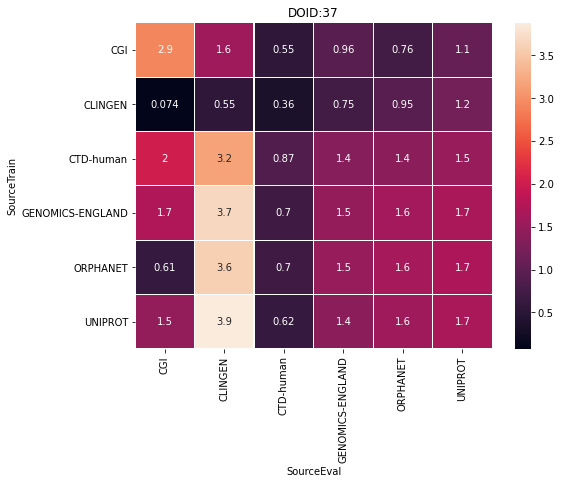

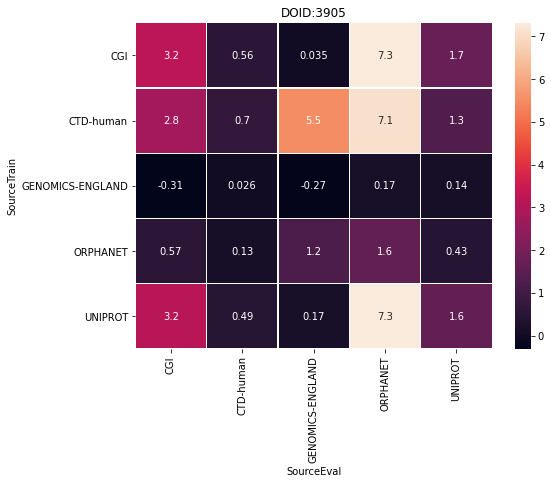

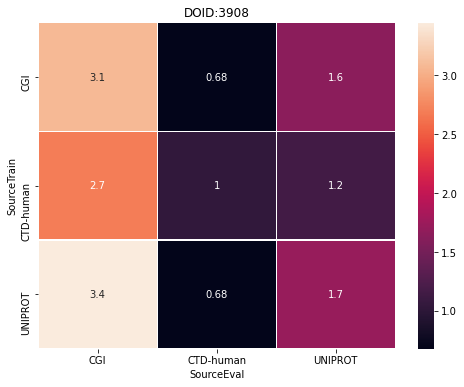

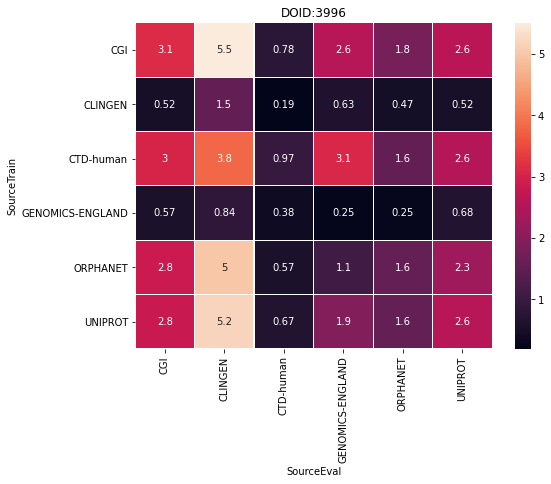

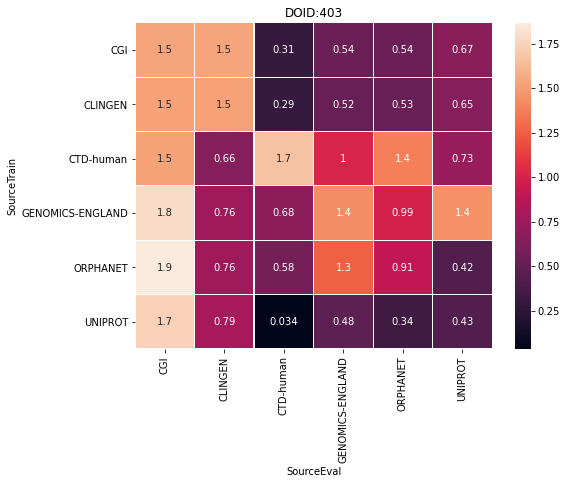

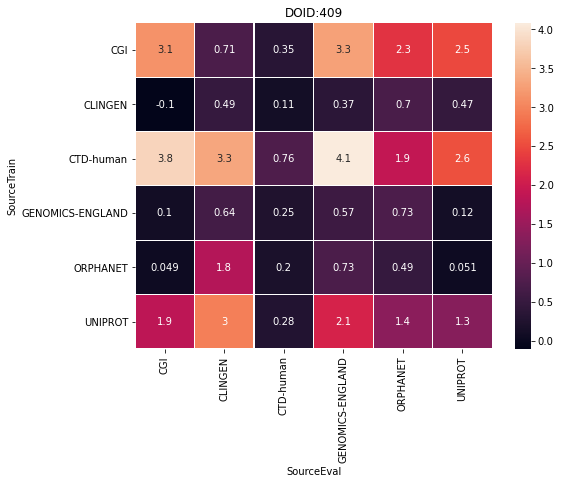

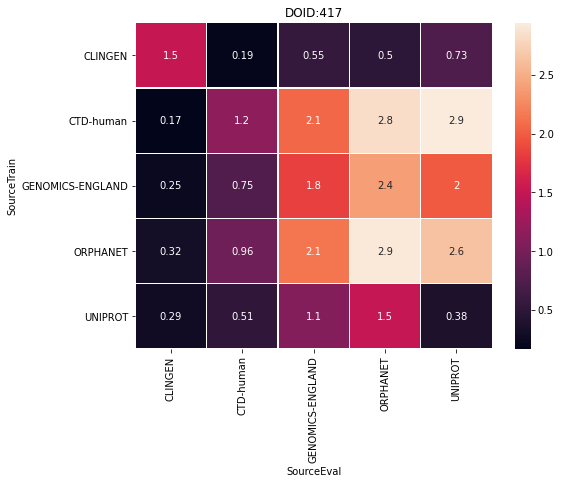

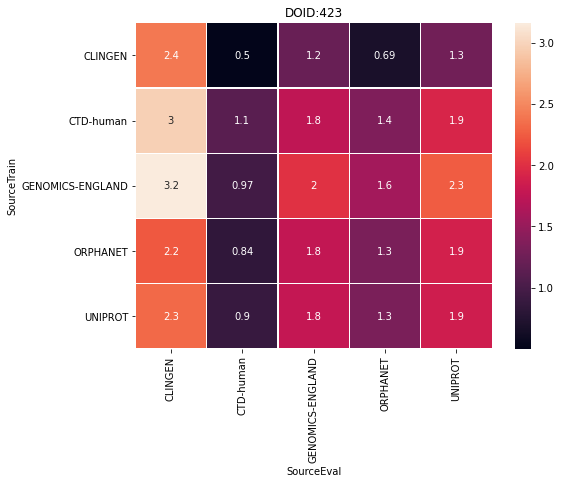

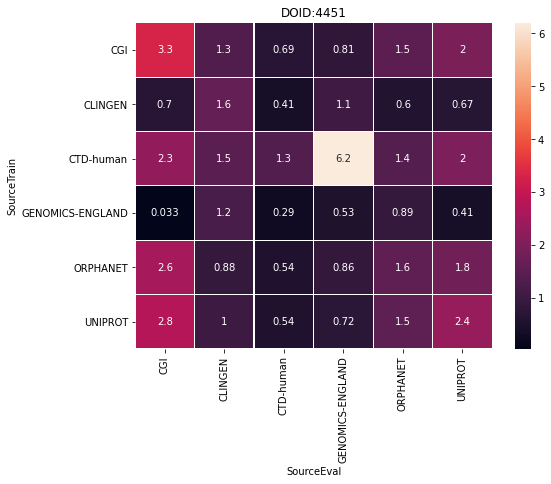

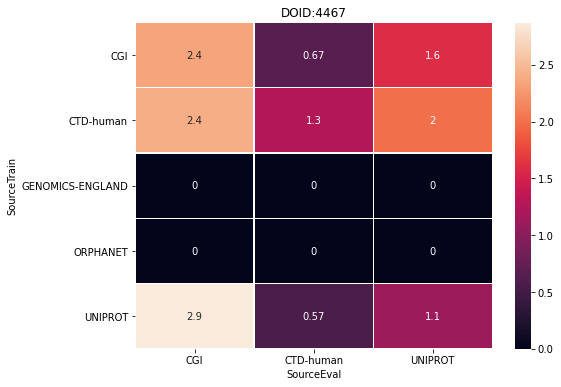

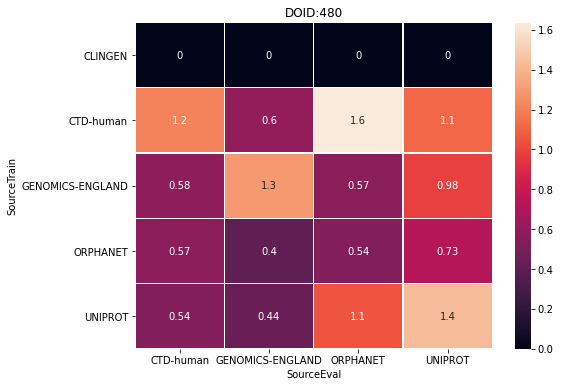

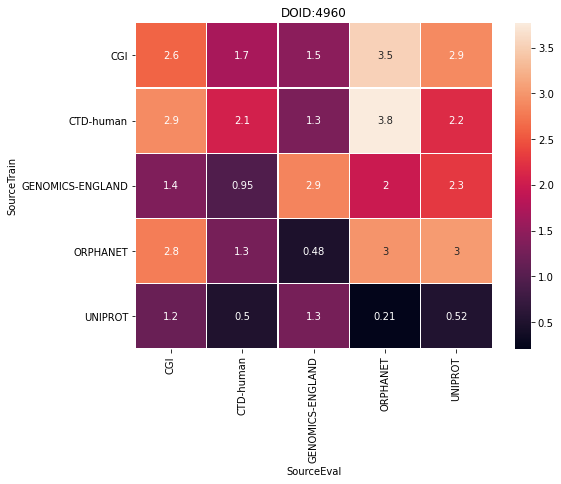

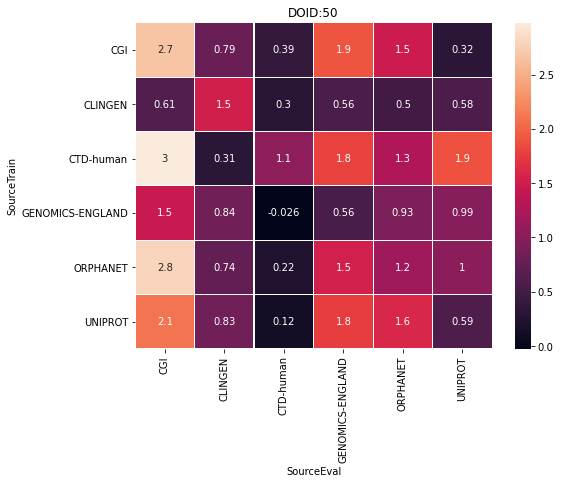

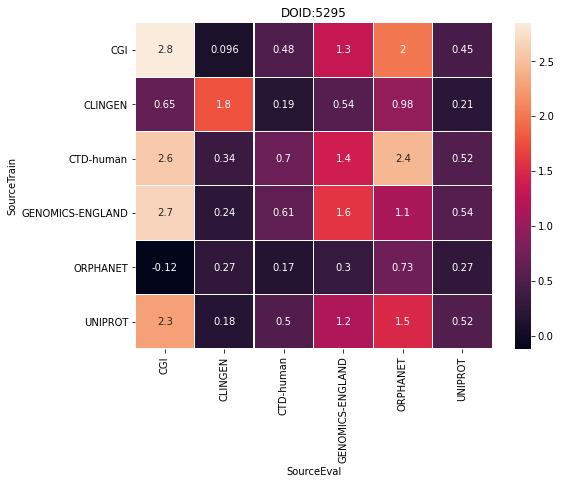

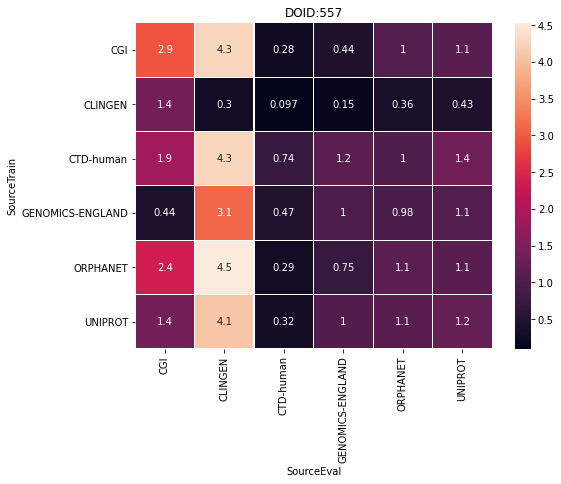

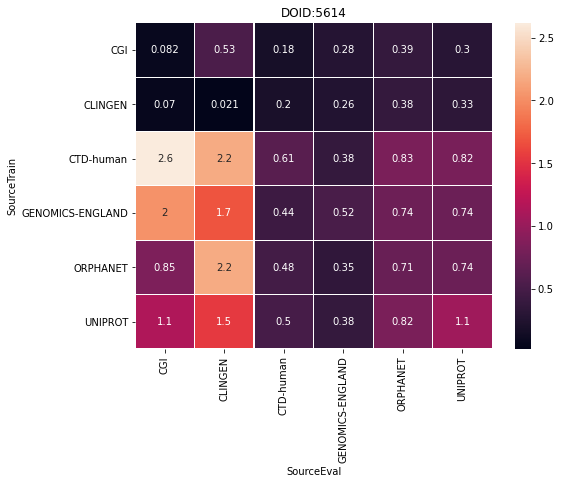

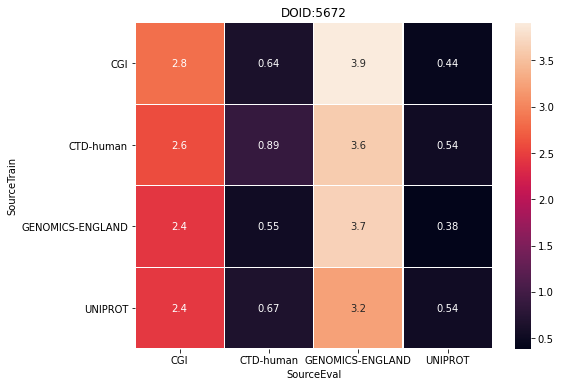

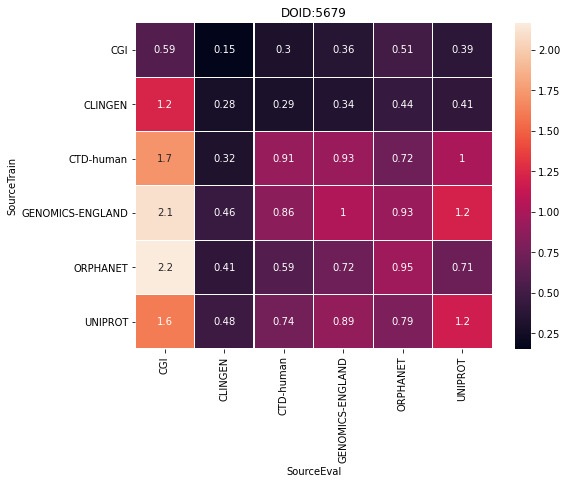

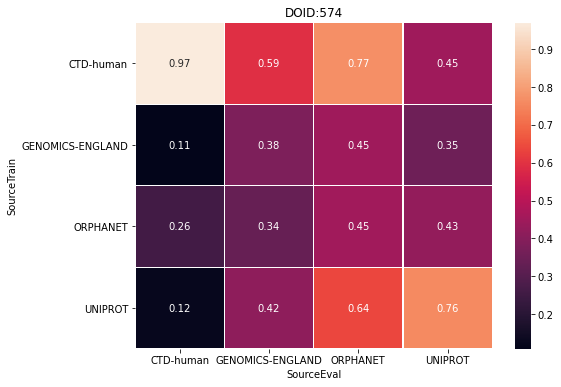

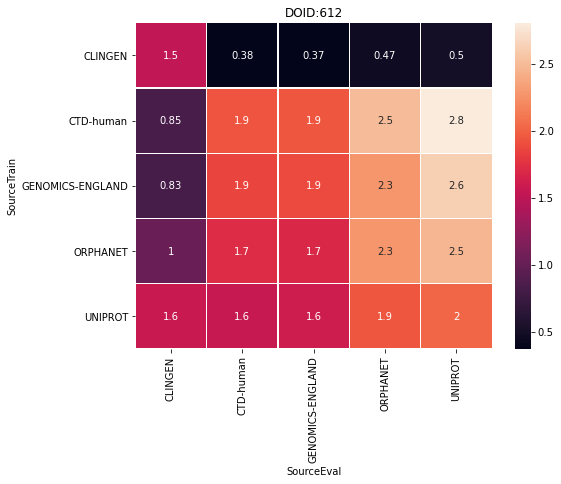

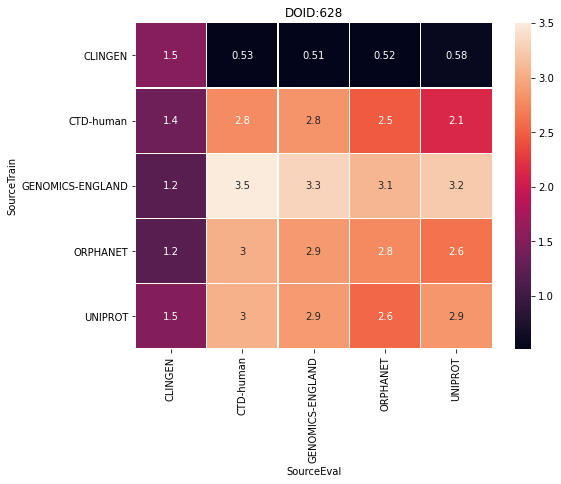

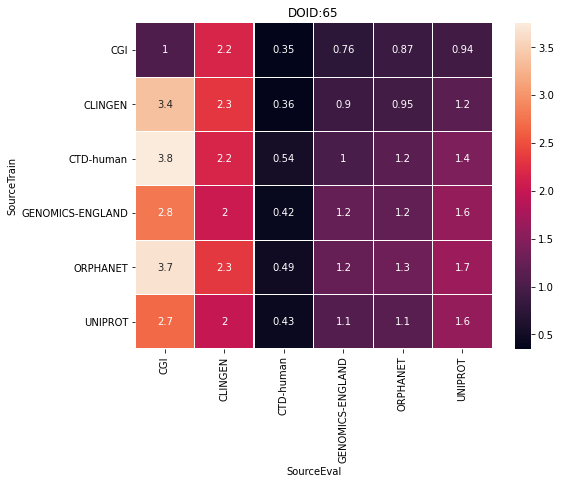

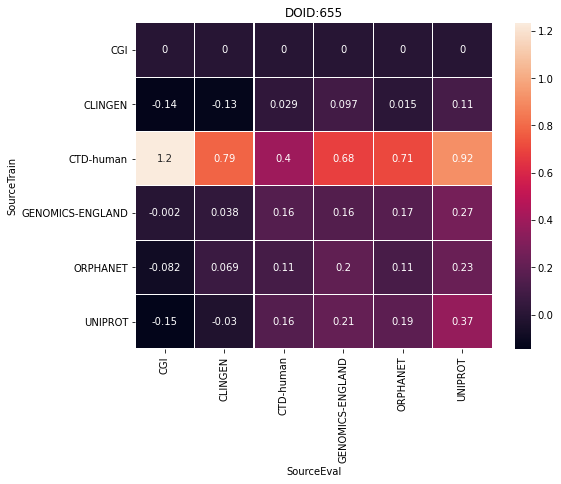

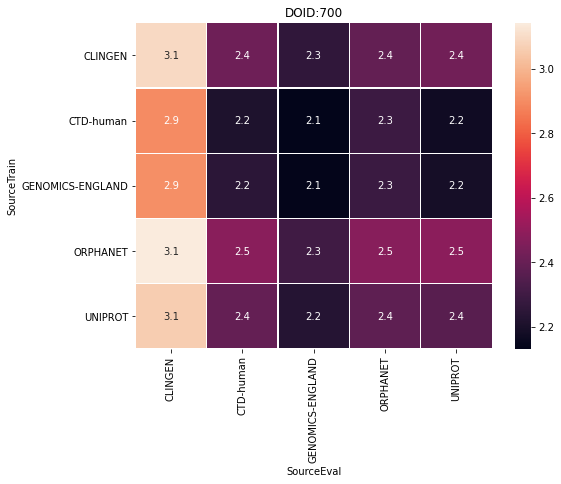

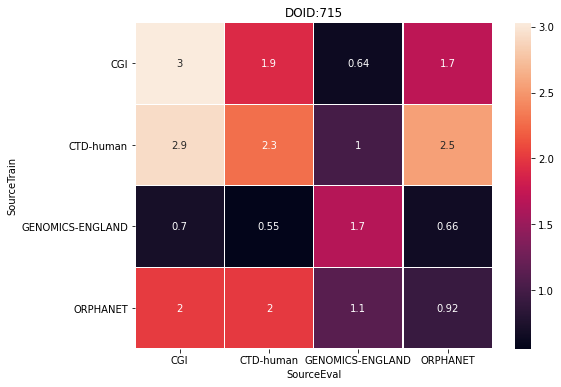

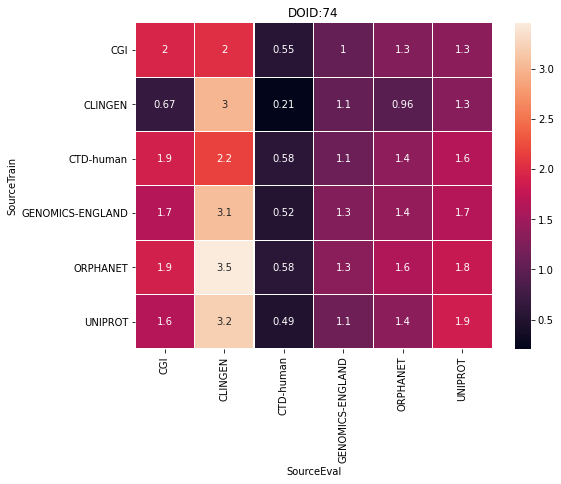

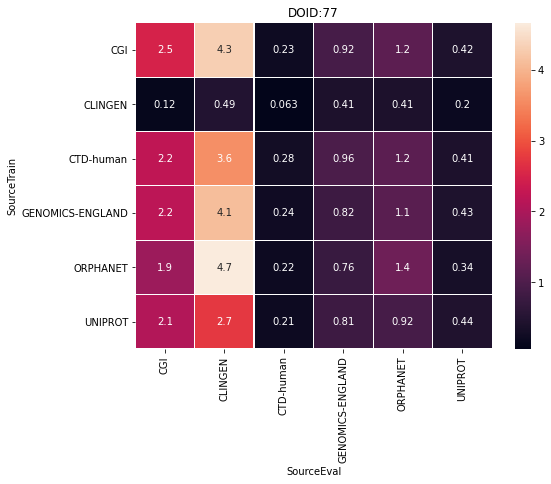

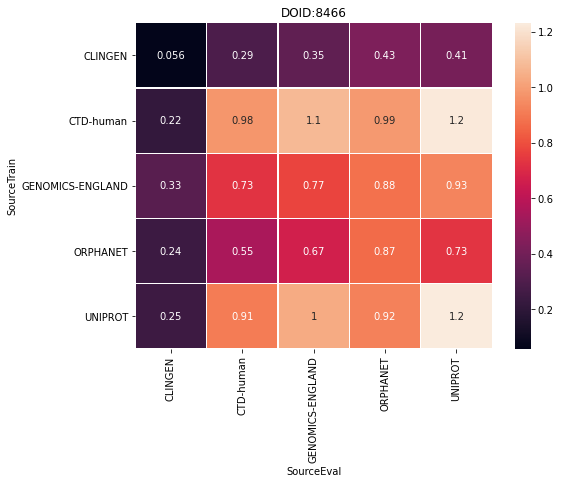

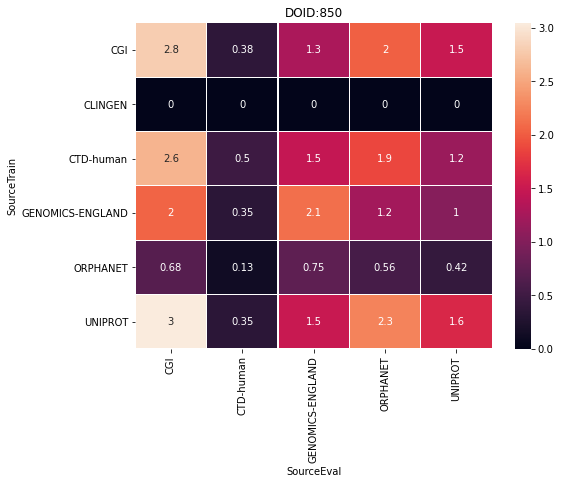

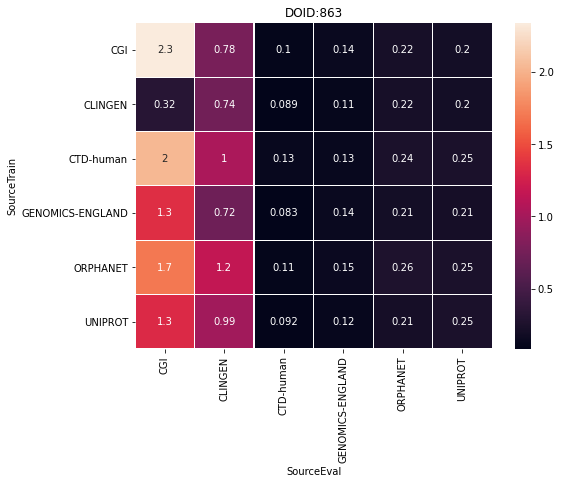

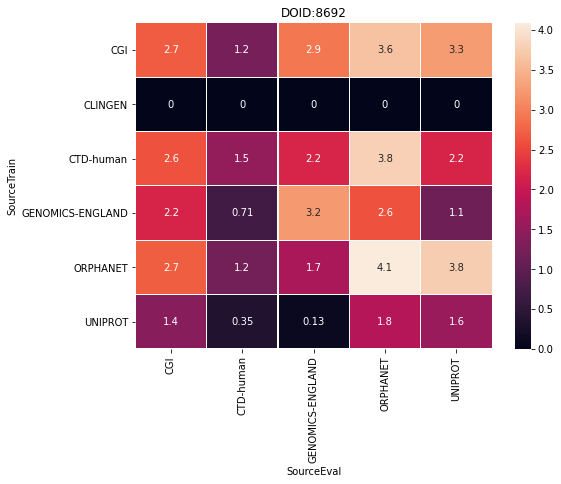

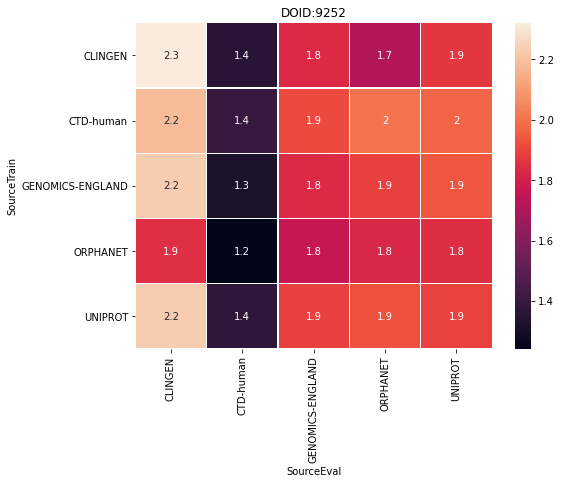

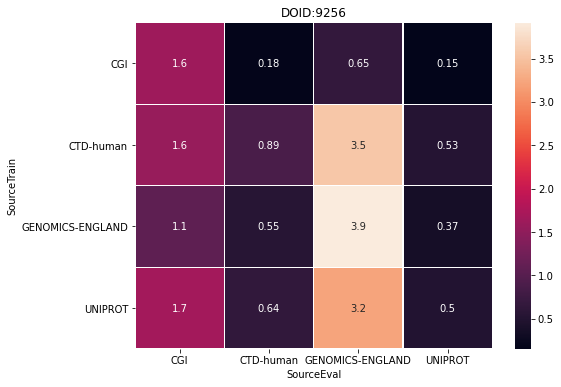

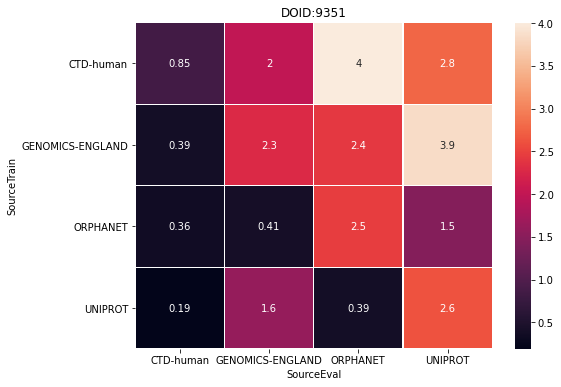

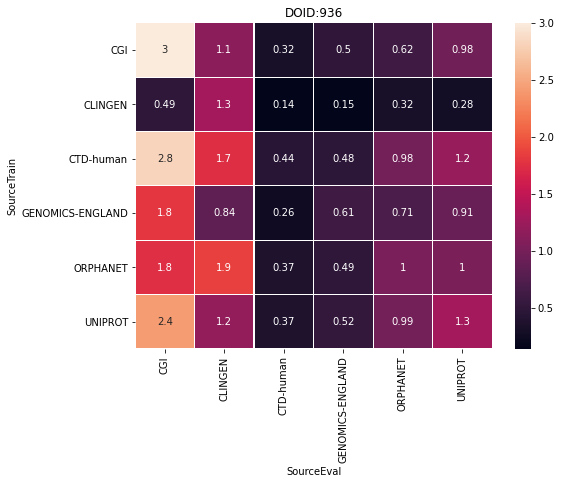

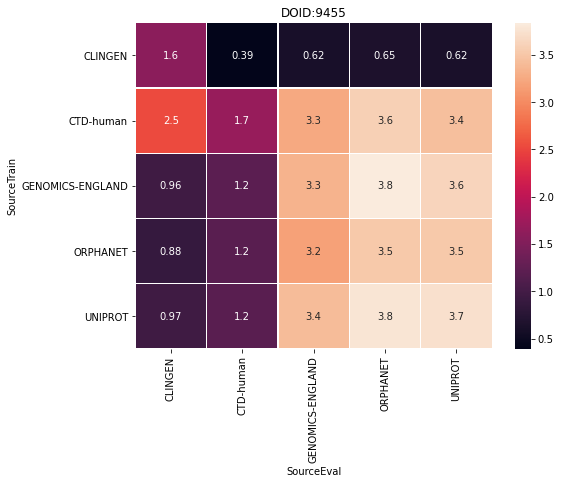

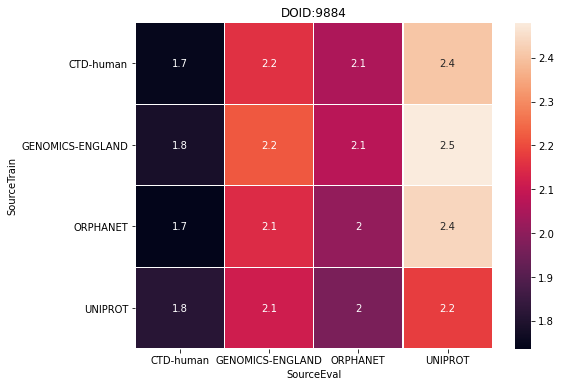

In [4]:
dict_of_DOIDS = dict(iter(df.groupby('DOID')))

for DOID in dict_of_DOIDS:
    result = dict_of_DOIDS[DOID].pivot("SourceTrain", "SourceEval", "log2(auPRC/prior)")
    fig, ax = plt.subplots(figsize=(8,6))   
    ax = sns.heatmap(result, annot = True, linewidths = .25)
    plt.title(DOID)

In [3]:
df2 = df.groupby(by = ['SourceTrain', 'SourceEval'])['log2(auPRC/prior)'].apply(lambda x: list(x))
df2 = df2.reset_index()
df2

SourceTrain        SourceEval  \
0                CGI               CGI   
1                CGI           CLINGEN   
2                CGI         CTD-human   
3                CGI  GENOMICS-ENGLAND   
4                CGI          ORPHANET   
5                CGI          PSYGENET   
6                CGI           UNIPROT   
7            CLINGEN               CGI   
8            CLINGEN           CLINGEN   
9            CLINGEN         CTD-human   
10           CLINGEN  GENOMICS-ENGLAND   
11           CLINGEN          ORPHANET   
12           CLINGEN          PSYGENET   
13           CLINGEN           UNIPROT   
14         CTD-human               CGI   
15         CTD-human           CLINGEN   
16         CTD-human         CTD-human   
17         CTD-human  GENOMICS-ENGLAND   
18         CTD-human          ORPHANET   
19         CTD-human          PSYGENET   
20         CTD-human           UNIPROT   
21  GENOMICS-ENGLAND               CGI   
22  GENOMICS-ENGLAND           CLINGEN   
23  GENOMICS-ENGLAND         CTD-human   
24  GENOMICS-ENGLAND  GENOMICS-ENGLAND   
25  GENOMICS-ENGLAND          ORPHANET   
26  GENOMICS-ENGLAND          PSYGENET   
27  GENOMICS-ENGLAND           UNIPROT   
28          ORPHANET               CGI   
29          ORPHANET           CLINGEN   
30          ORPHANET         CTD-human   
31          ORPHANET  GENOMICS-ENGLAND   
32          ORPHANET          ORPHANET   
33          ORPHANET          PSYGENET   
34          ORPHANET           UNIPROT   
35          PSYGENET           CLINGEN   
36          PSYGENET         CTD-human   
37          PSYGENET  GENOMICS-ENGLAND   
38          PSYGENET          ORPHANET   
39          PSYGENET          PSYGENET   
40          PSYGENET           UNIPROT   
41           UNIPROT               CGI   
42           UNIPROT           CLINGEN   
43           UNIPROT         CTD-human   
44           UNIPROT  GENOMICS-ENGLAND   
45           UNIPROT          ORPHANET   
46           UNIPROT          PSYGENET   
47           UNIPROT           UNIPROT   

                                    log2(auPRC/prior)  
0   [3.347903643739826, 1.0475152363172295, 3.4380...  
1   [4.314359697463584, 3.0495449348518235, 2.1567...  
2   [0.0979513859144298, 0.1202889794261244, 0.181...  
3   [0.4430444614773747, 1.4786910443413803, 3.378...  
4   [3.88206247629226, 2.025806268920547, 0.540099...  
5                                               [0.0]  
6   [0.9774032331983116, 2.7342373513599734, 2.929...  
7   [0.0, -0.1359781289137808, 0.4654673580049523,...  
8   [-0.0916256648469598, 1.5305147166987798, 1.77...  
9   [2.624736552934185, 0.2986406900113862, 3.6210...  
10  [0.0, 1.3577946511986574, 1.946468926258296, 0...  
11  [1.9868547125881204, 0.0, 0.708735955294433, 0...  
12           [0.1170079475421206, 1.1244113359619132]  
13  [4.530972729208515, 0.2080355316984019, 1.1503...  
14  [2.614241157262988, 2.2744837751073748, 2.0034...  
15  [2.1769474112401763, 3.884675548708023, 0.2158...  
16  [1.6323670459285018, 0.642349010050576, 2.6242...  
17  [1.0053143934780195, 2.1391203120446183, 1.823...  
18  [1.2394136418955364, 3.141200712405681, 0.7770...  
19           [2.5529591833867364, 0.3038987948065142]  
20  [1.3533352977245892, 1.9251471518307817, 2.736...  
21  [1.6502998589136049, 2.7852782974596235, -0.00...  
22  [3.1213662902660646, 0.6415931382661556, 4.019...  
23  [0.0563432603698154, 1.5320666735536483, 0.440...  
24  [1.835396737614648, 3.1666971379238023, 2.3225...  
25  [2.210550199596464, 1.943349356592151, 0.27353...  
26            [1.8737553087841785, 0.175600940736099]  
27  [0.1371571561696708, 1.0602105406035005, 0.383...  
28  [2.8476451636775417, 1.855323202124952, 0.0, 1...  
29  [2.9232815524351827, 5.827430923578069, 3.4558...  
30  [0.5069829097339413, 0.5500429421927453, 0.254...  
31  [0.4889373385746525, 1.8147073657277344, 0.858...  
32  [0.791067558020349, 3.9379645703386714, 1.4855...  
33            [0.2344758836873481, 1.730821227

In [4]:
metricsets = df2['log2(auPRC/prior)']
medians = []
for list in metricsets:
    medians.append(statistics.median(list))
df2['Median'] = medians
df2

SourceTrain        SourceEval  \
0                CGI               CGI   
1                CGI           CLINGEN   
2                CGI         CTD-human   
3                CGI  GENOMICS-ENGLAND   
4                CGI          ORPHANET   
5                CGI          PSYGENET   
6                CGI           UNIPROT   
7            CLINGEN               CGI   
8            CLINGEN           CLINGEN   
9            CLINGEN         CTD-human   
10           CLINGEN  GENOMICS-ENGLAND   
11           CLINGEN          ORPHANET   
12           CLINGEN          PSYGENET   
13           CLINGEN           UNIPROT   
14         CTD-human               CGI   
15         CTD-human           CLINGEN   
16         CTD-human         CTD-human   
17         CTD-human  GENOMICS-ENGLAND   
18         CTD-human          ORPHANET   
19         CTD-human          PSYGENET   
20         CTD-human           UNIPROT   
21  GENOMICS-ENGLAND               CGI   
22  GENOMICS-ENGLAND           CLINGEN   
23  GENOMICS-ENGLAND         CTD-human   
24  GENOMICS-ENGLAND  GENOMICS-ENGLAND   
25  GENOMICS-ENGLAND          ORPHANET   
26  GENOMICS-ENGLAND          PSYGENET   
27  GENOMICS-ENGLAND           UNIPROT   
28          ORPHANET               CGI   
29          ORPHANET           CLINGEN   
30          ORPHANET         CTD-human   
31          ORPHANET  GENOMICS-ENGLAND   
32          ORPHANET          ORPHANET   
33          ORPHANET          PSYGENET   
34          ORPHANET           UNIPROT   
35          PSYGENET           CLINGEN   
36          PSYGENET         CTD-human   
37          PSYGENET  GENOMICS-ENGLAND   
38          PSYGENET          ORPHANET   
39          PSYGENET          PSYGENET   
40          PSYGENET           UNIPROT   
41           UNIPROT               CGI   
42           UNIPROT           CLINGEN   
43           UNIPROT         CTD-human   
44           UNIPROT  GENOMICS-ENGLAND   
45           UNIPROT          ORPHANET   
46           UNIPROT          PSYGENET   
47           UNIPROT           UNIPROT   

                                    log2(auPRC/prior)    Median  
0   [3.347903643739826, 1.0475152363172295, 3.4380...  2.805199  
1   [4.314359697463584, 3.0495449348518235, 2.1567...  1.549942  
2   [0.0979513859144298, 0.1202889794261244, 0.181...  0.557200  
3   [0.4430444614773747, 1.4786910443413803, 3.378...  1.068722  
4   [3.88206247629226, 2.025806268920547, 0.540099...  1.750898  
5                                               [0.0]  0.000000  
6   [0.9774032331983116, 2.7342373513599734, 2.929...  1.341964  
7   [0.0, -0.1359781289137808, 0.4654673580049523,...  0.465467  
8   [-0.0916256648469598, 1.5305147166987798, 1.77...  1.548503  
9   [2.624736552934185, 0.2986406900113862, 3.6210...  0.197292  
10  [0.0, 1.3577946511986574, 1.946468926258296, 0...  0.542779  
11  [1.9868547125881204, 0.0, 0.708735955294433, 0...  0.520441  
12           [0.1170079475421206, 1.1244113359619132]  0.620710  
13  [4.530972729208515, 0.2080355316984019, 1.1503...  0.538098  
14  [2.614241157262988, 2.2744837751073748, 2.0034...  2.605505  
15  [2.1769474112401763, 3.884675548708023, 0.2158...  2.185130  
16  [1.6323670459285018, 0.642349010050576, 2.6242...  0.976807  
17  [1.0053143934780195, 2.1391203120446183, 1.823...  1.959460  
18  [1.2394136418955364, 3.141200712405681, 0.7770...  1.887365  
19           [2.5529591833867364, 0.3038987948065142]  1.428429  
20  [1.3533352977245892, 1.9251471518307817, 2.736...  1.902634  
21  [1.6502998589136049, 2.7852782974596235, -0.00...  1.452759  
22  [3.1213662902660646, 0.6415931382661556, 4.019...  1.464911  
23  [0.0563432603698154, 1.5320666735536483, 0.440...  0.547907  
24  [1.835396737614648, 3.1666971379238023, 2.3225...  1.619369  
25  [2.210550199596464, 1.943349356592151, 0.27353...  1.309274  
26            [1.8737553087841785, 0.175600940736099]  1.024678  
27  [0.1371571561696708, 1.0602105406035005, 0.383...  1.142234  
28  [2.8476451636775417, 1.855323202

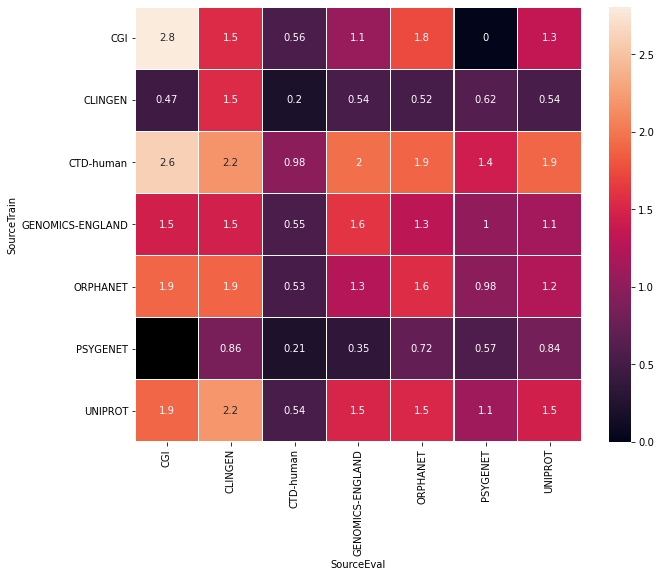

In [6]:
df3 = df2.pivot("SourceTrain", "SourceEval", "Median")
fig, ax = plt.subplots(figsize=(10,8))   
ax = sns.heatmap(df3, annot = True, linewidths = .25)
ax.set_facecolor('xkcd:black')